In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

In [2]:
df = pd.read_csv('../../Python for ML/DATA/rock_density_xray.csv')

In [4]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [5]:
df.columns = ['Signal', 'Density']

<Axes: xlabel='Signal', ylabel='Density'>

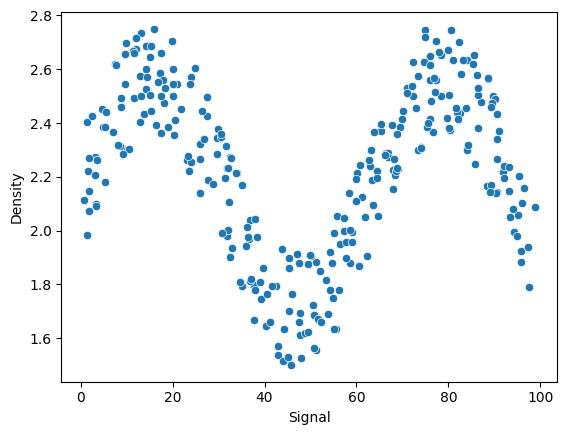

In [6]:
sns.scatterplot(x='Signal', y='Density', data=df)

In [13]:
X = df['Signal']#.values.reshape(-1, 1)
y = df['Density']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [11]:
lr_model = LinearRegression()

In [14]:
lr_model.fit(X_train, y_train)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [15]:
X = df['Signal'].values.reshape(-1, 1)
y = df['Density']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [17]:
lr_model = LinearRegression()

In [18]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [19]:
lr_preds = lr_model.predict(X_test)

In [20]:
lr_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [22]:
mean_absolute_error(y_test, lr_preds)

0.21119897331863283

In [23]:
np.sqrt(mean_squared_error(y_test, lr_preds))

np.float64(0.25700519965846286)

In [25]:
signal_range = np.arange(0, 100)

In [26]:
signal_preds = lr_model.predict(signal_range.reshape(-1, 1))

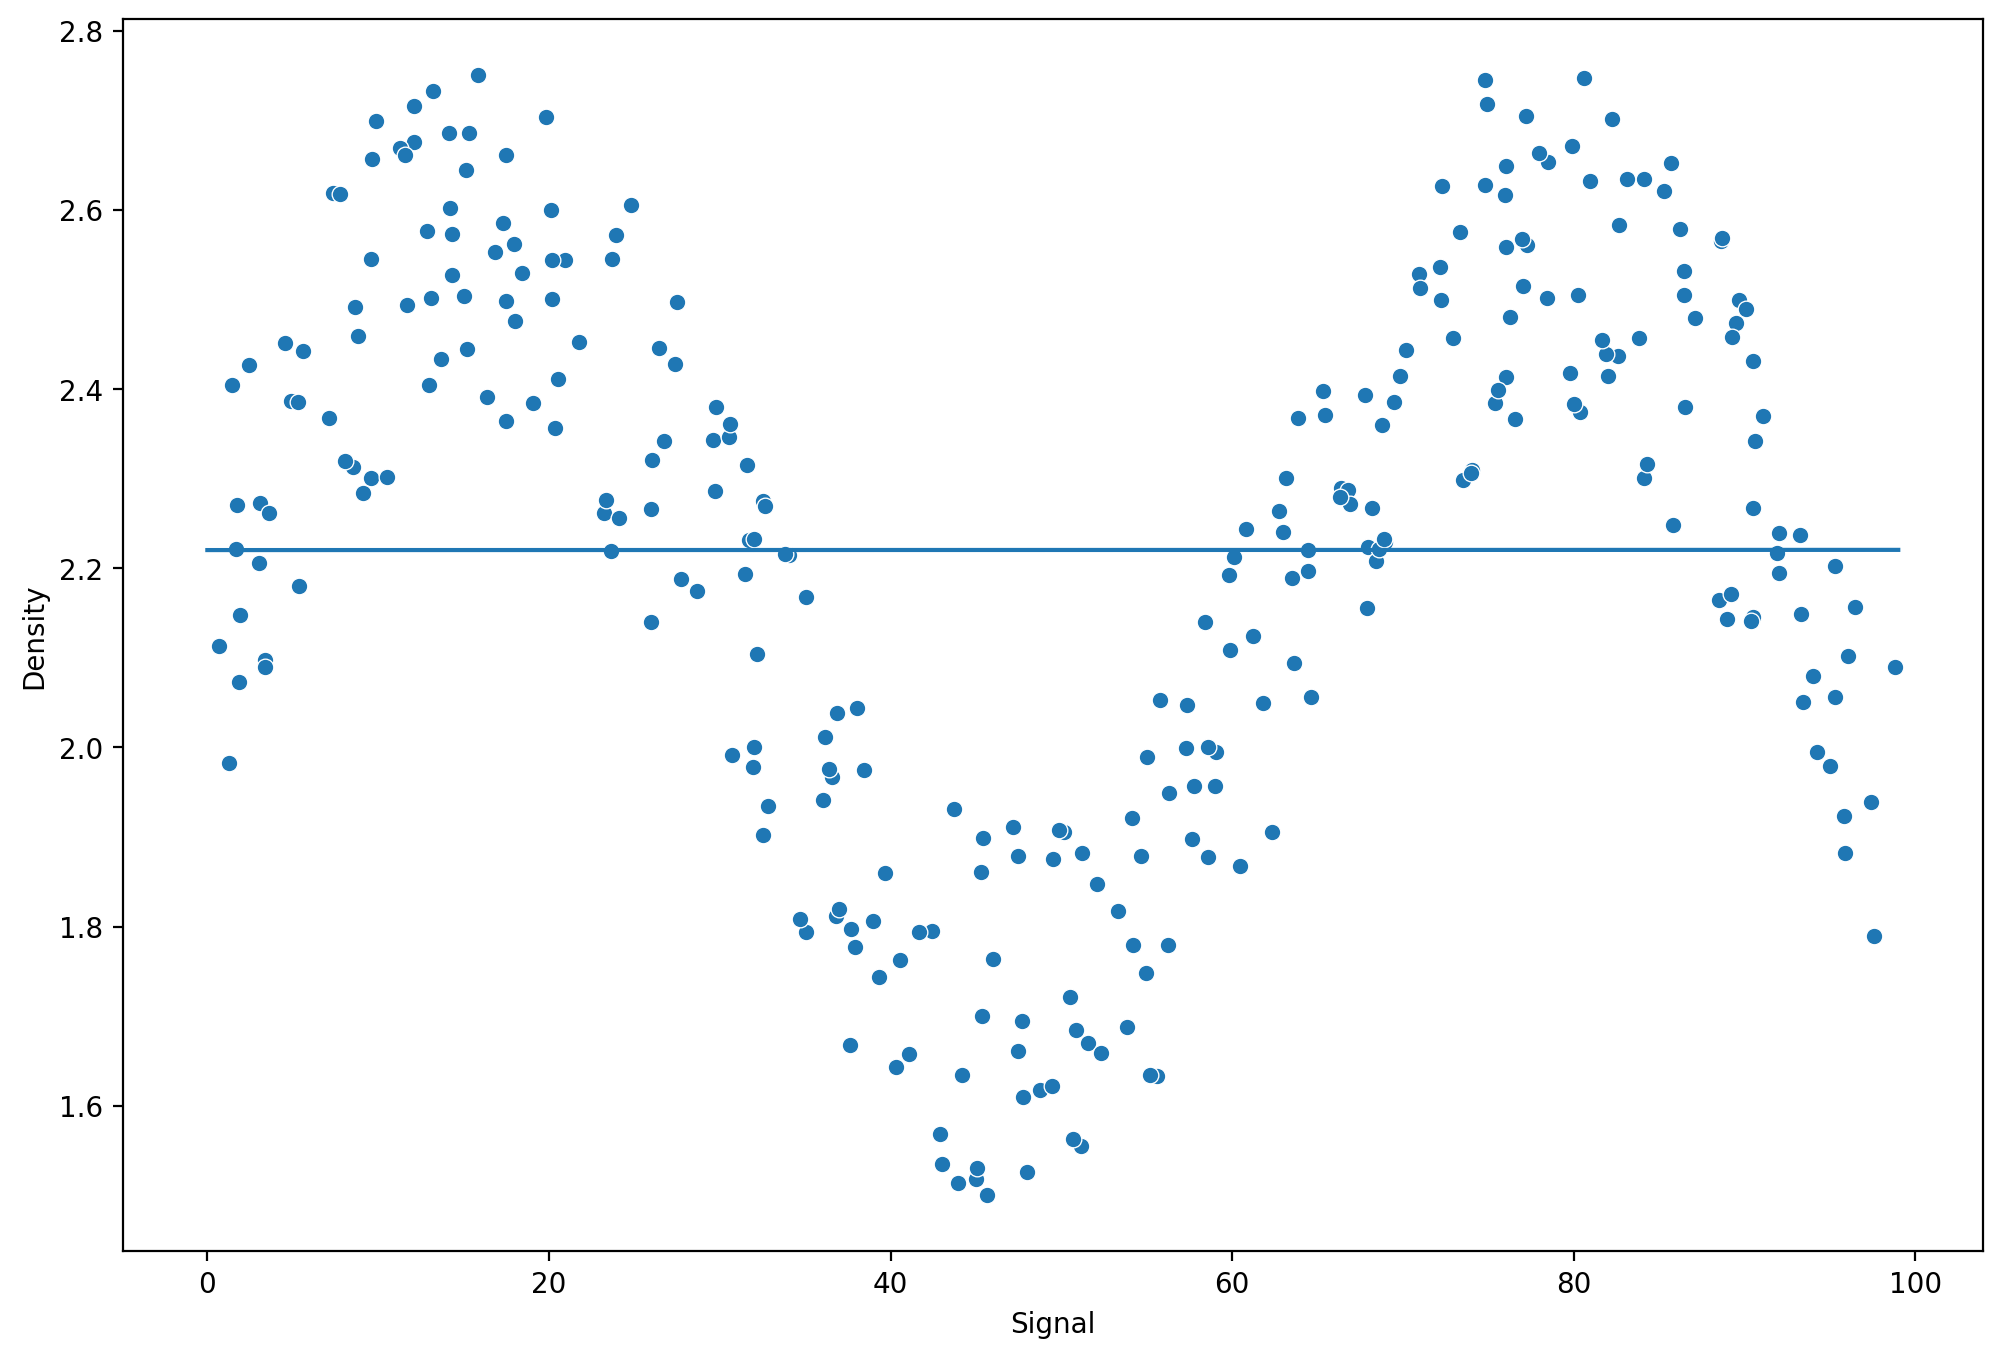

In [28]:
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(x='Signal', y='Density', data=df)

plt.plot(signal_range, signal_preds)

# Polynomial Regression

In [36]:
def run_model(model, X_train, y_train, X_test, y_test):
    # Fit model
    model.fit(X_train, y_train)

    # Get Metrics
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    
    # Plot results
    signal_range = np.arange(0, 100)
    output = model.predict(signal_range.reshape(-1, 1))

    plt.figure(figsize=(12, 8), dpi=200)
    sns.scatterplot(x='Signal', y='Density', data=df, color='green')
    
    plt.plot(signal_range, output)

MAE: 0.21119897331863283
RMSE: 0.25700519965846286


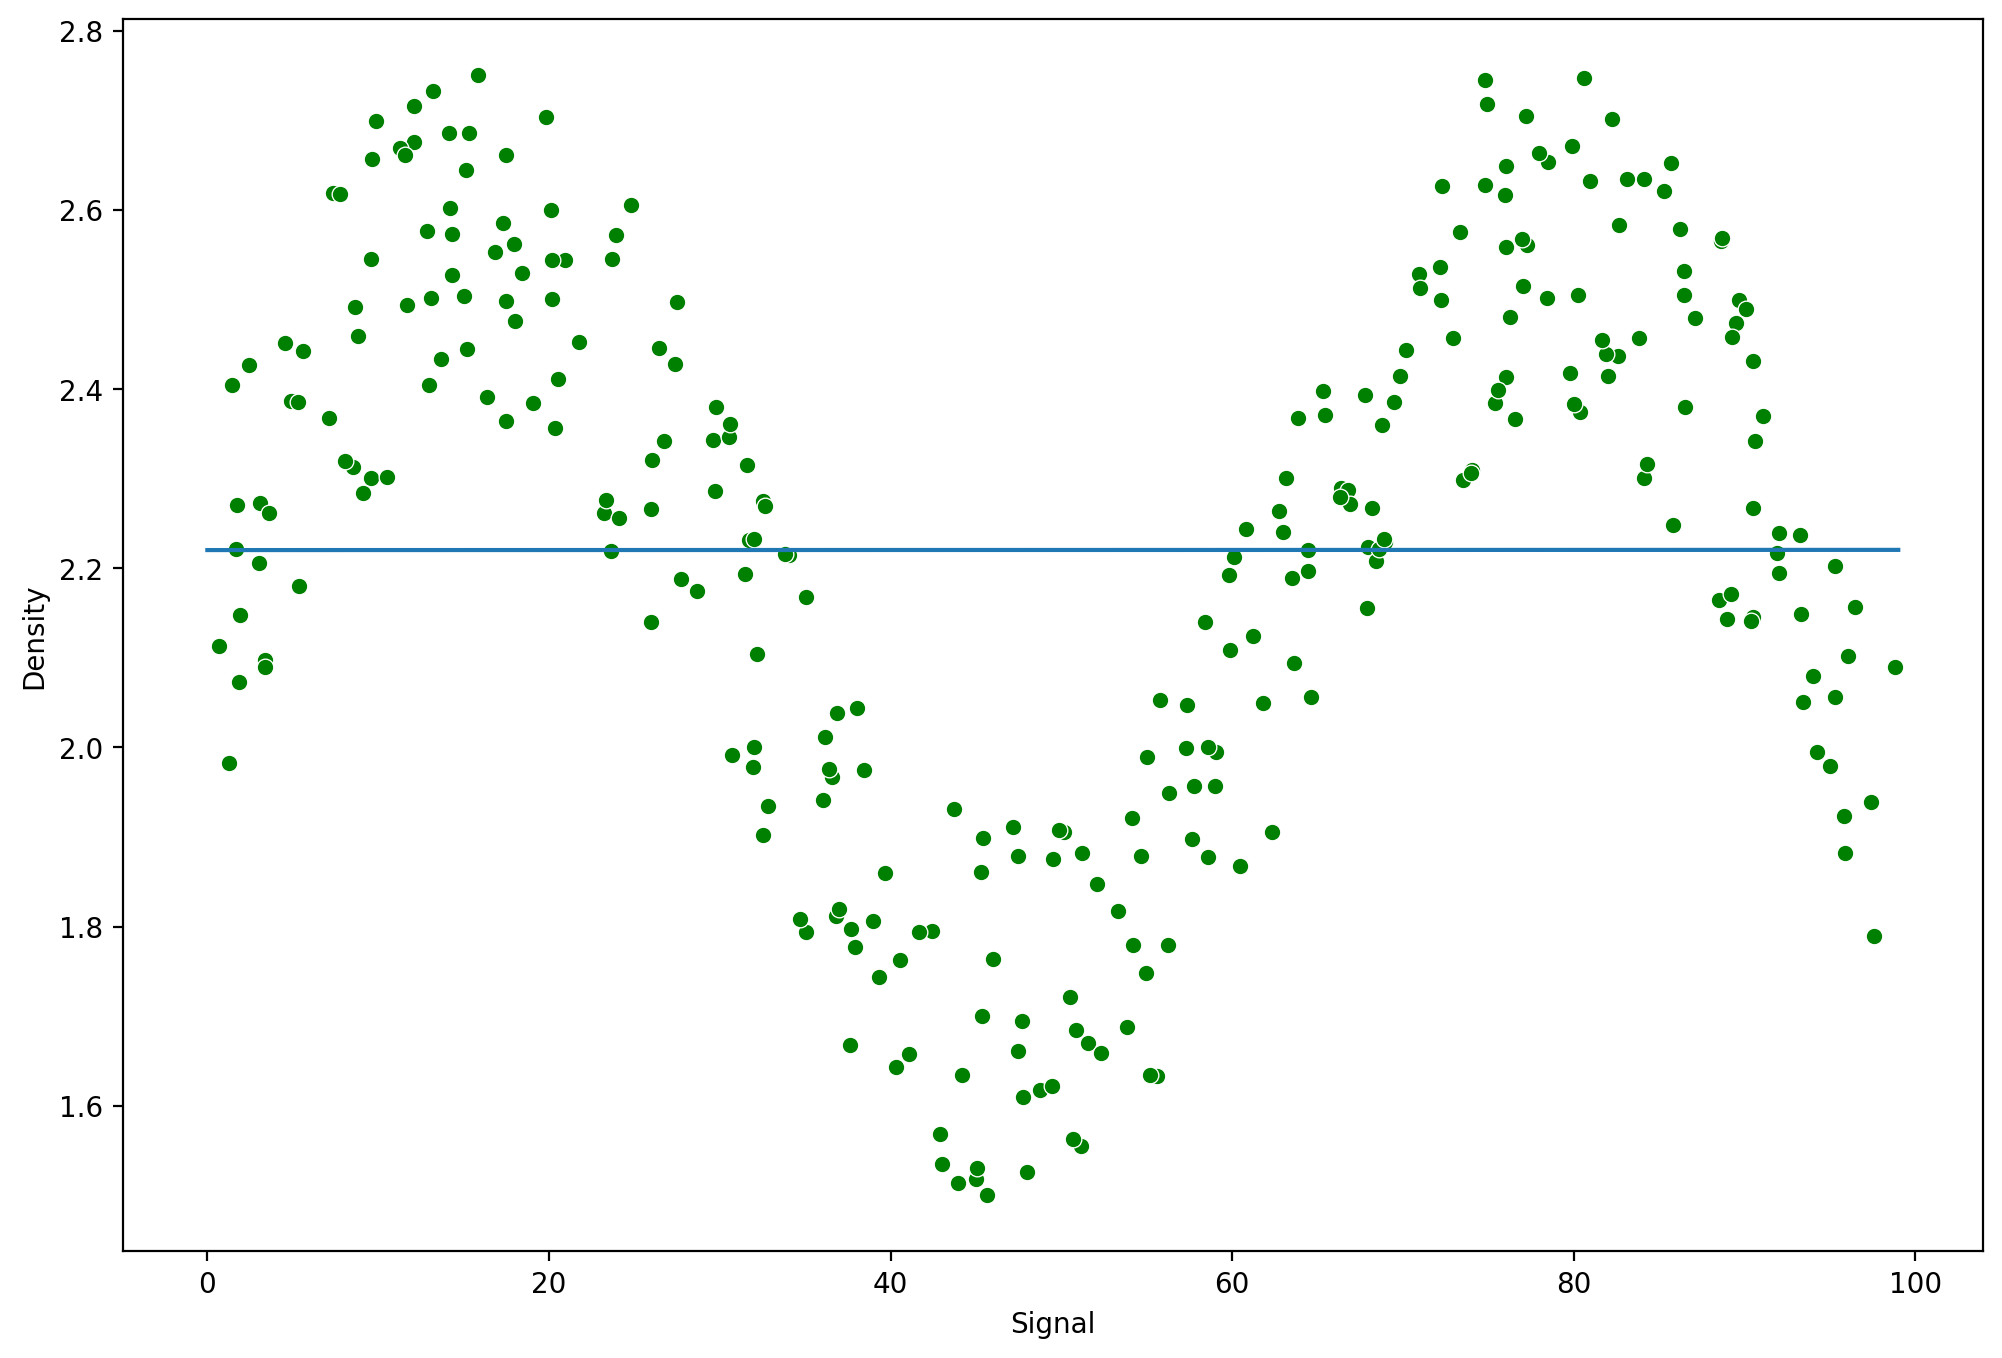

In [37]:
model = LinearRegression()
run_model(model, X_train, y_train, X_test, y_test)

MAE: 0.22903105443511151
RMSE: 0.28173095637255463


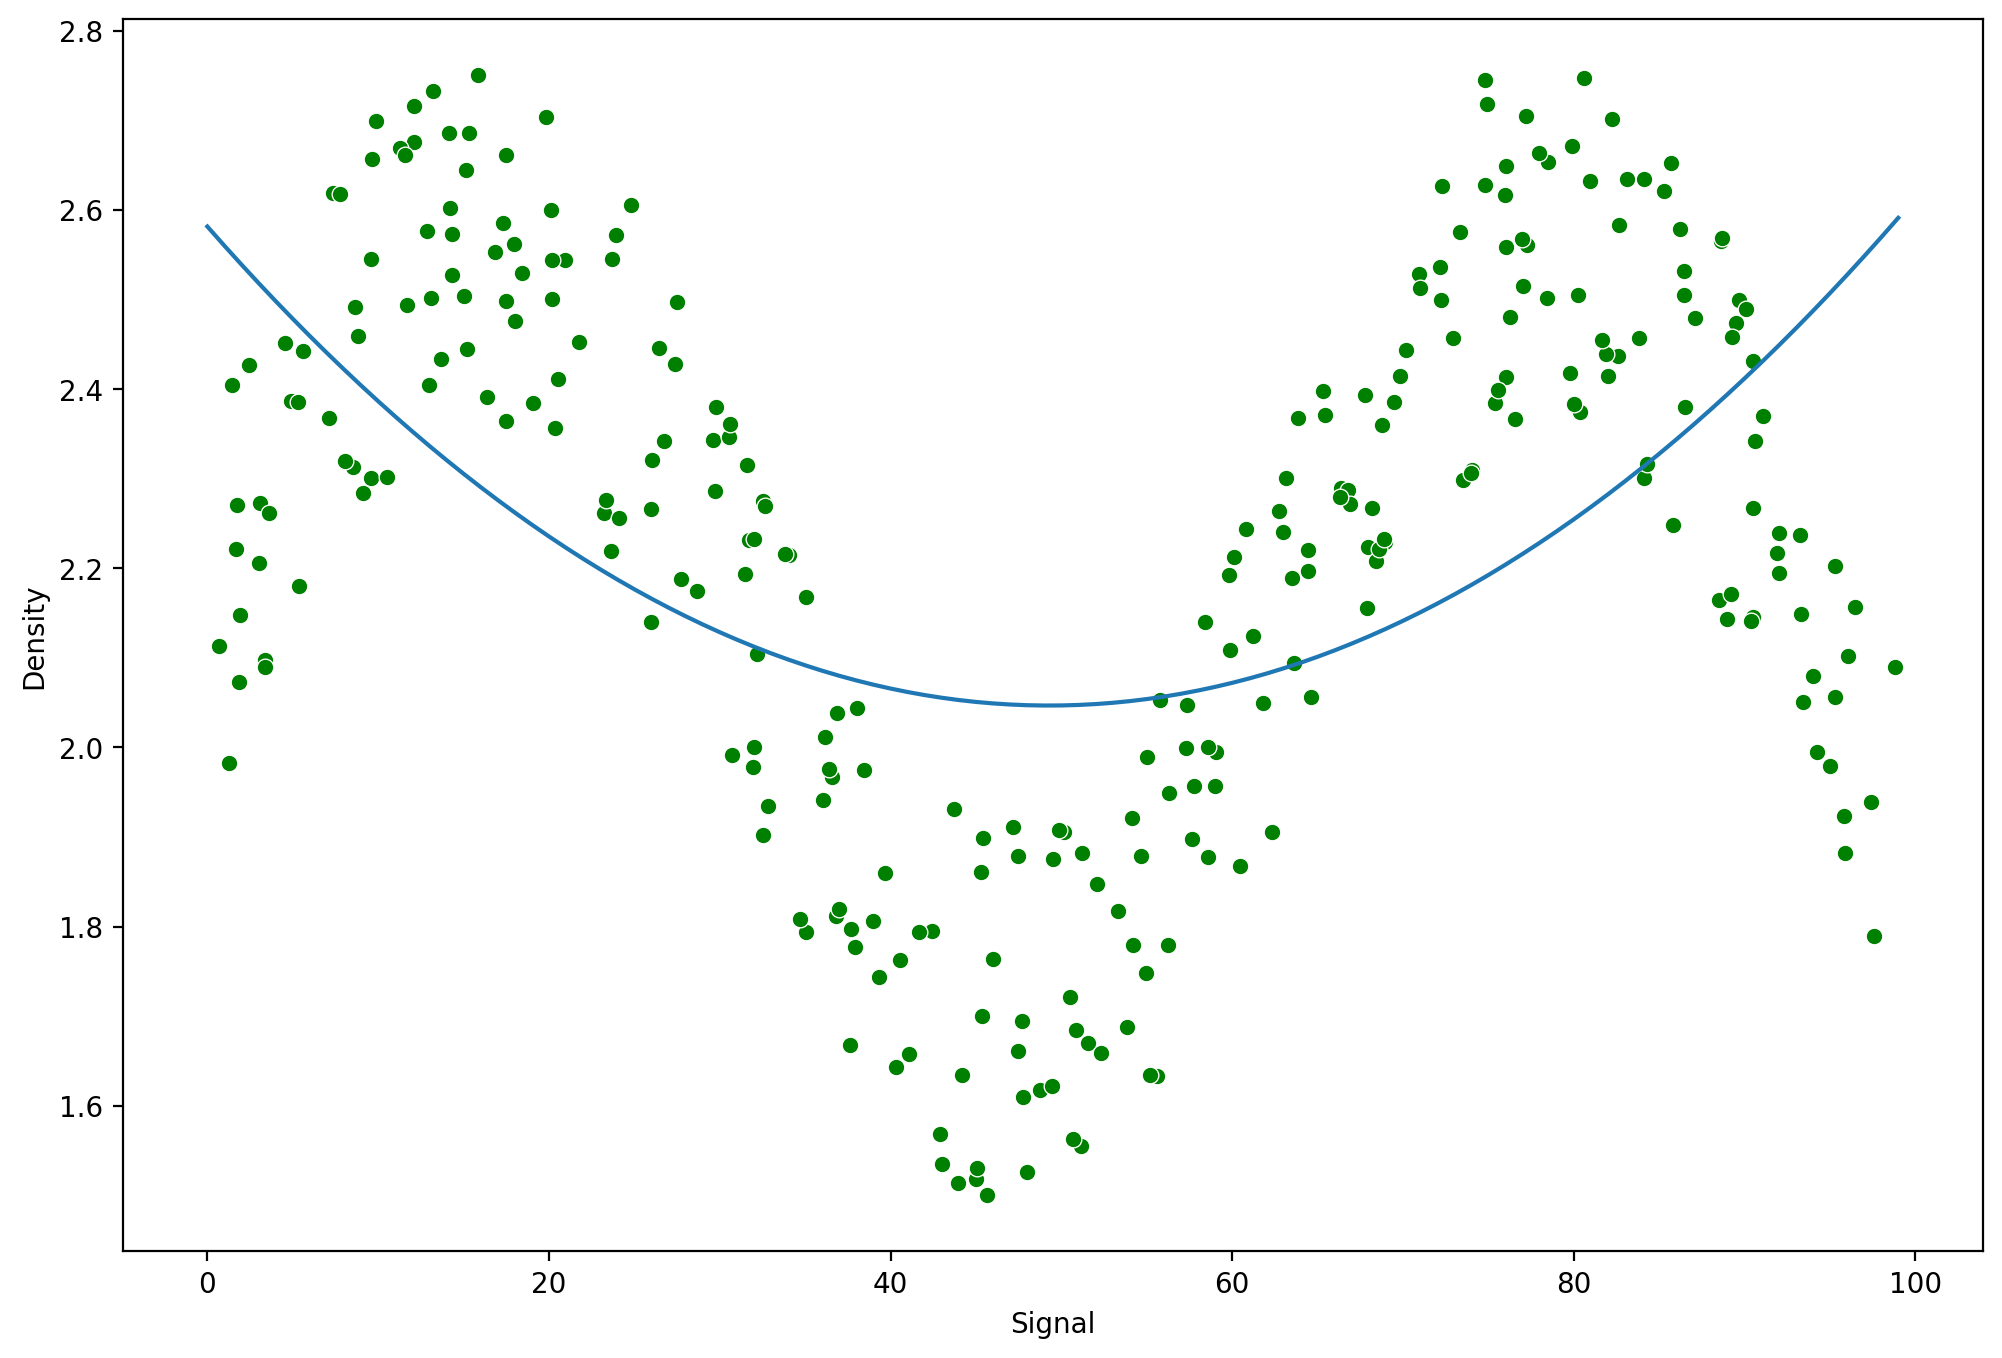

In [42]:
pipe = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
run_model(pipe, X_train, y_train, X_test, y_test)

MAE: 0.14338577194584667
RMSE: 0.1626900529281553


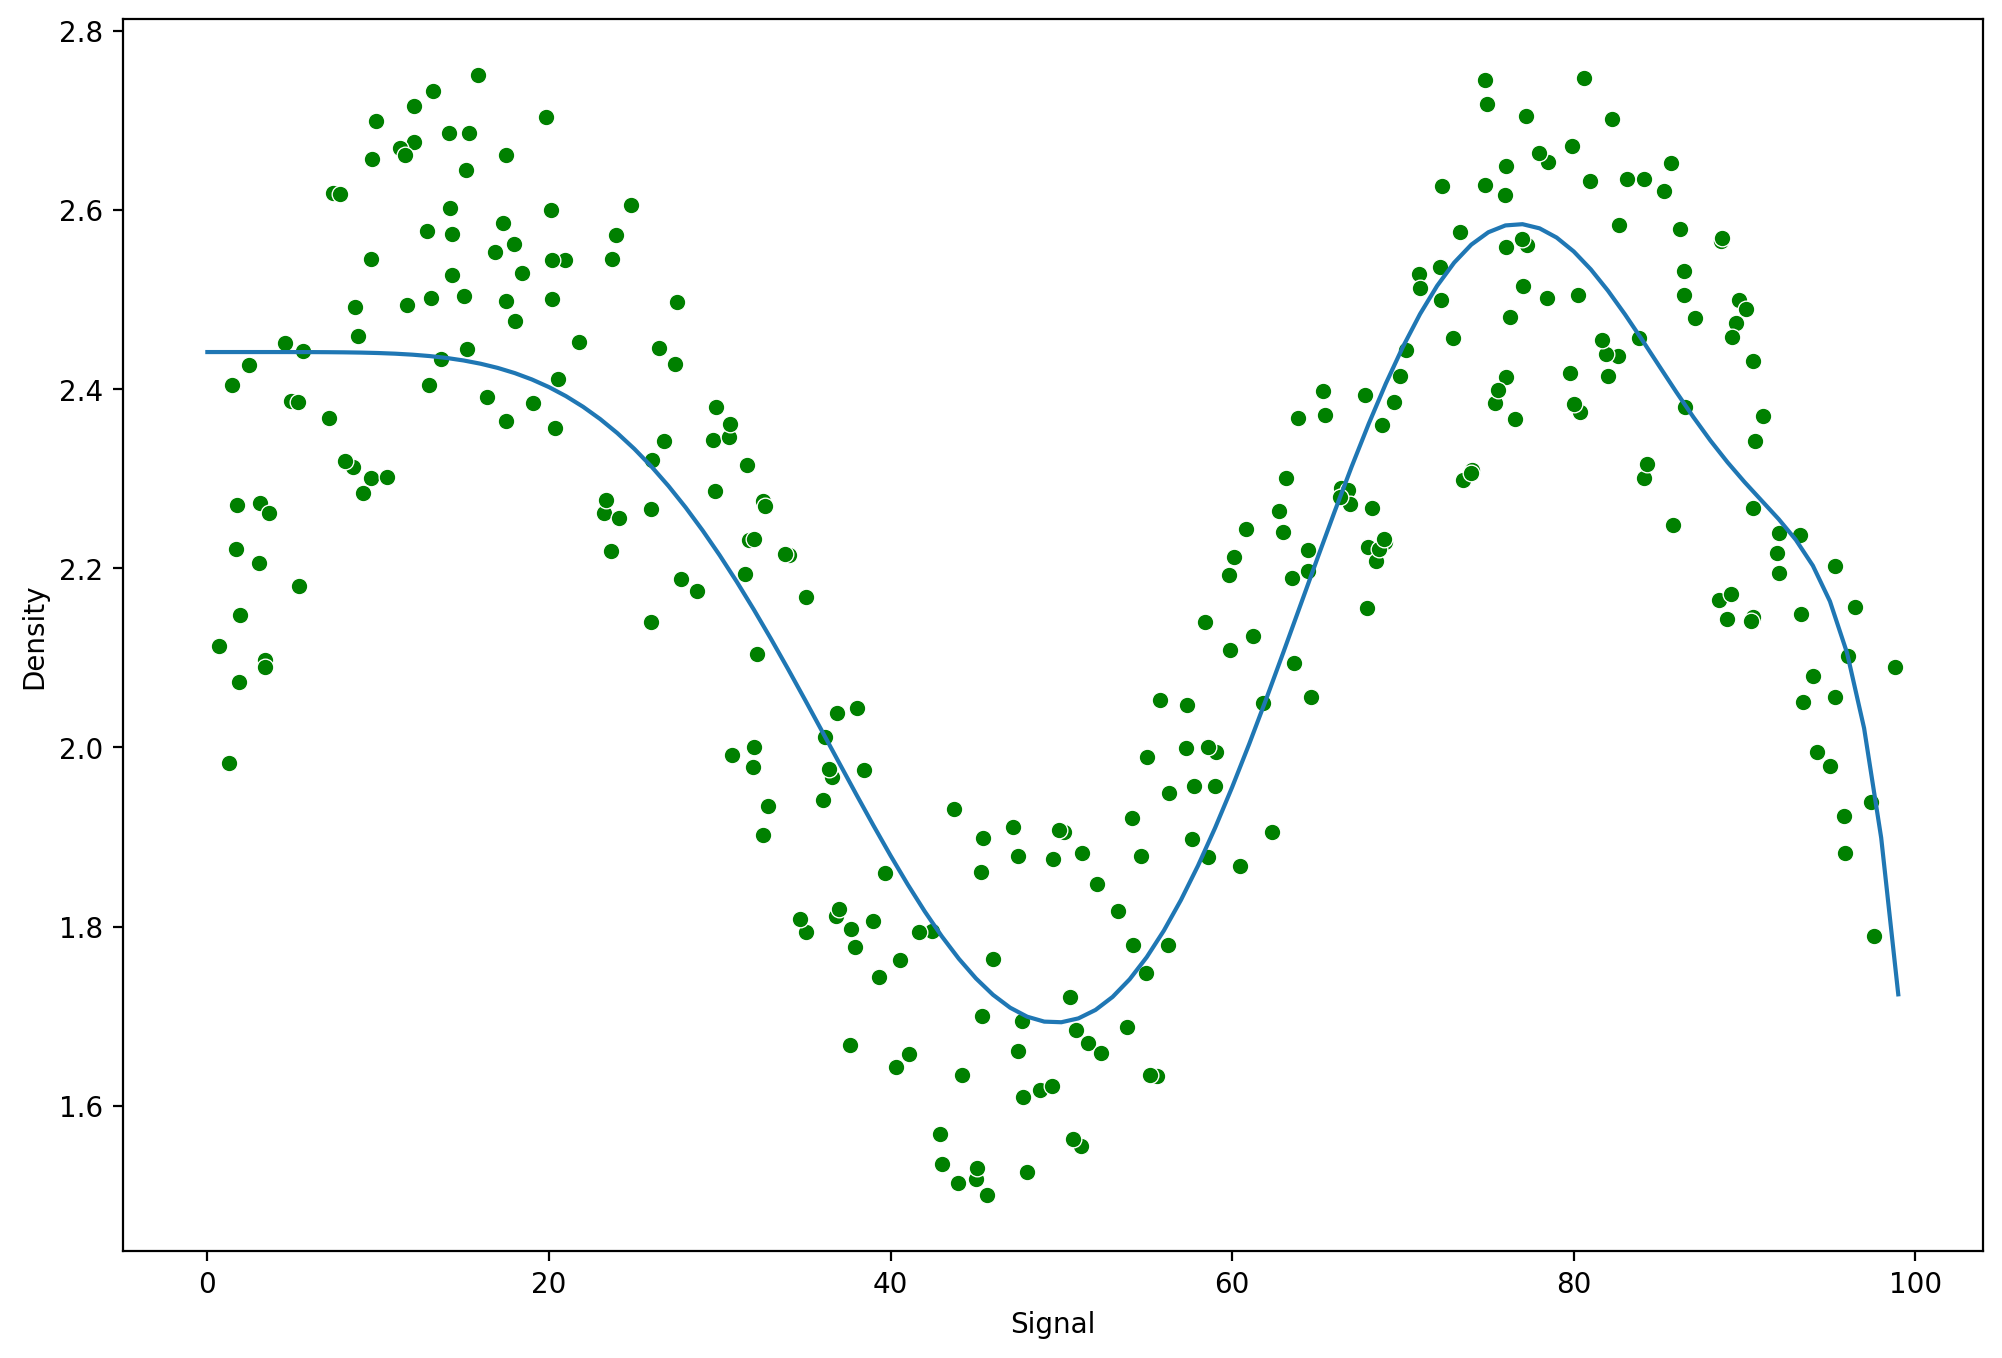

In [44]:
pipe = make_pipeline(PolynomialFeatures(degree=10), LinearRegression())
run_model(pipe, X_train, y_train, X_test, y_test)

MAE: 0.11969137272967002
RMSE: 0.13807476119008813


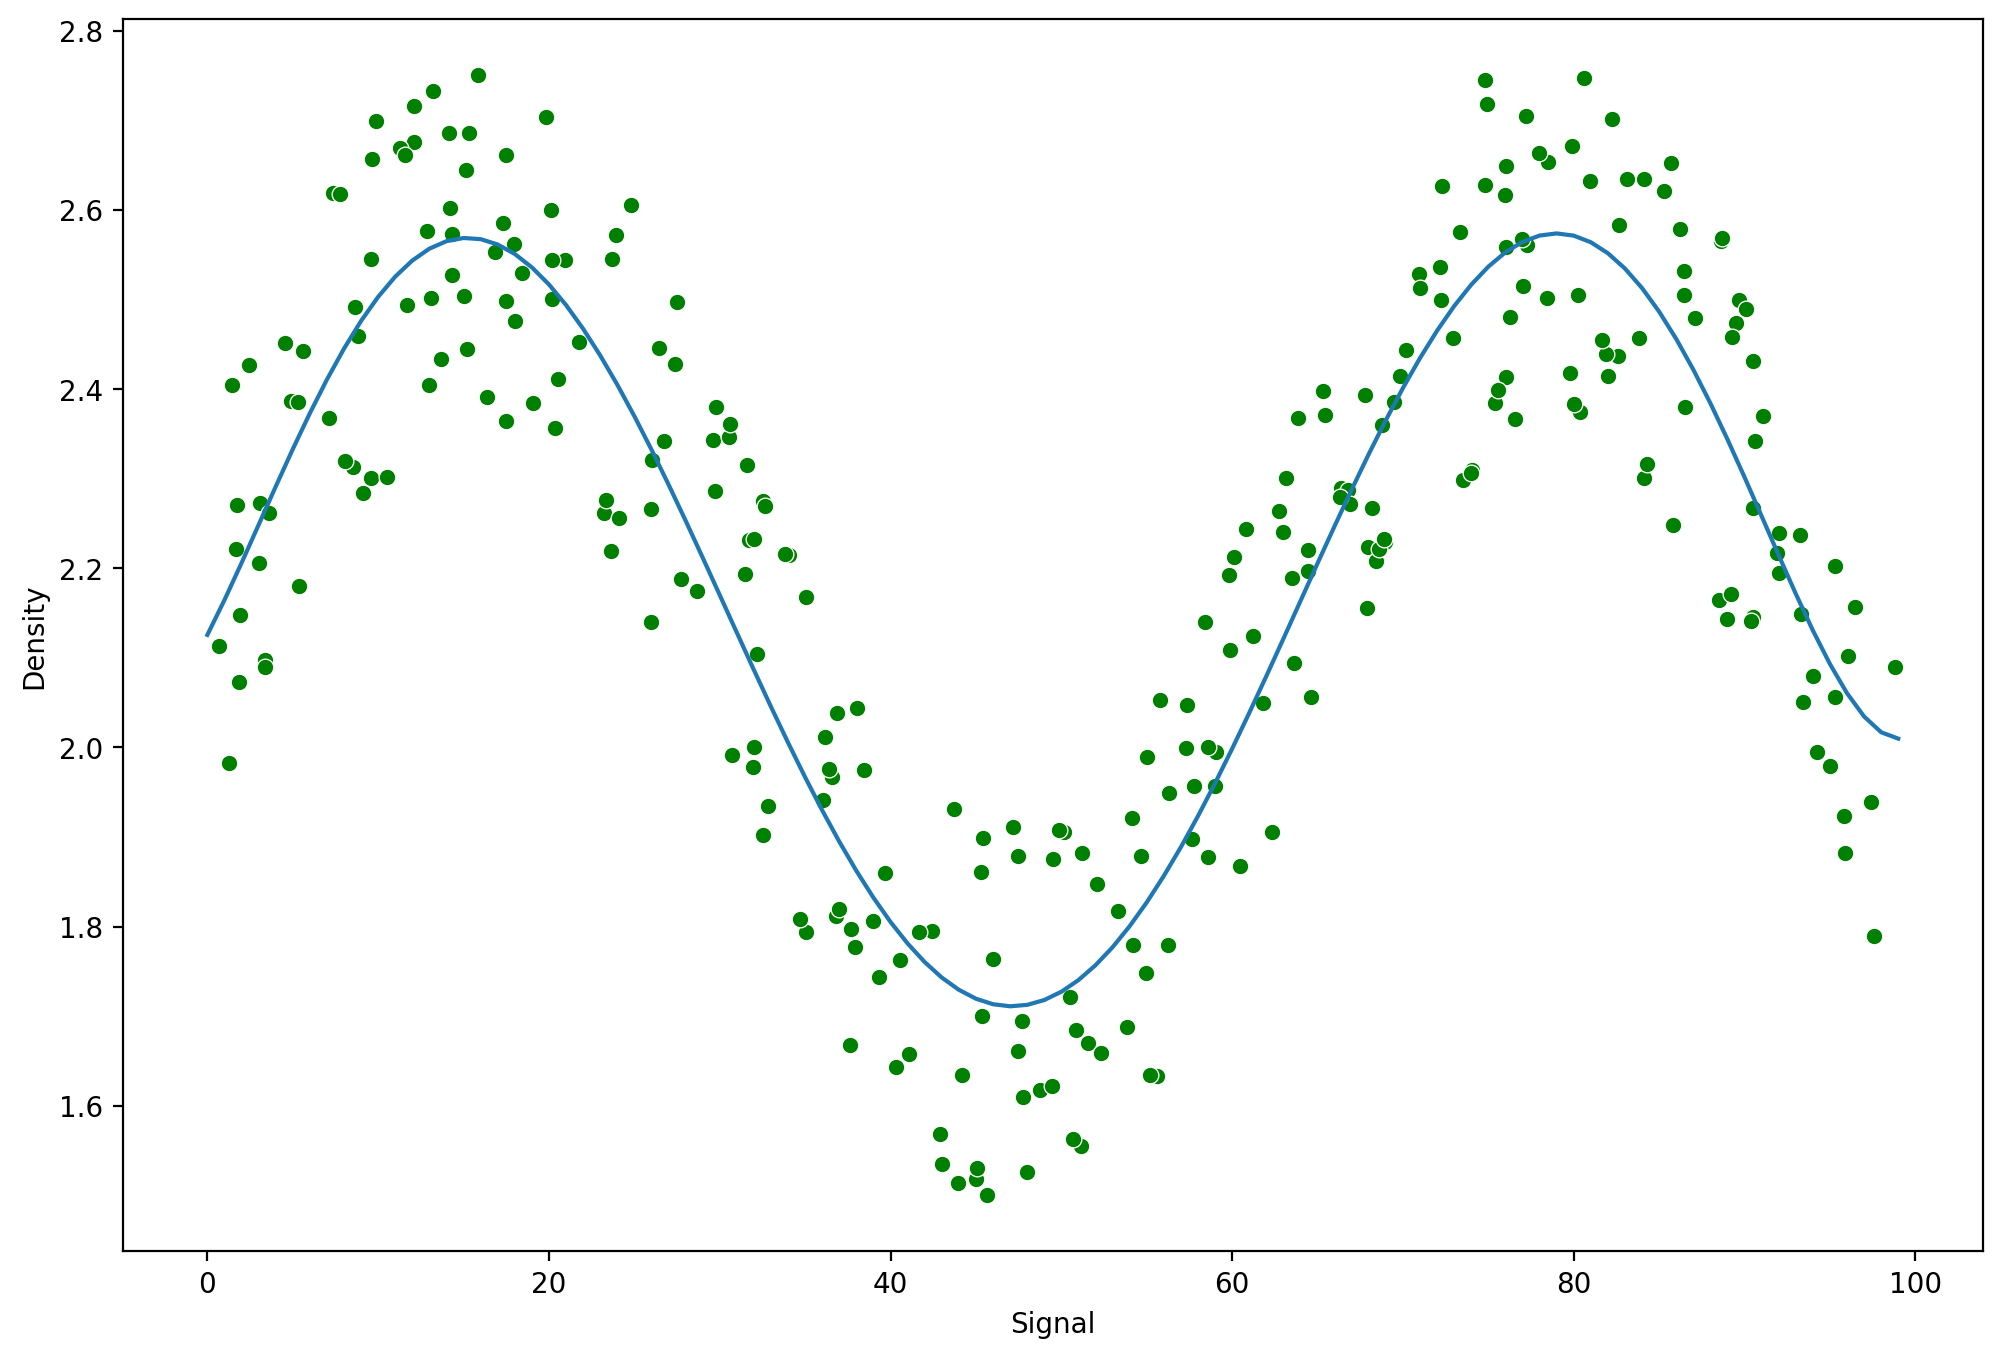

In [45]:
pipe = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())
run_model(pipe, X_train, y_train, X_test, y_test)

MAE: 0.20988580886016278
RMSE: 0.25685821237532913


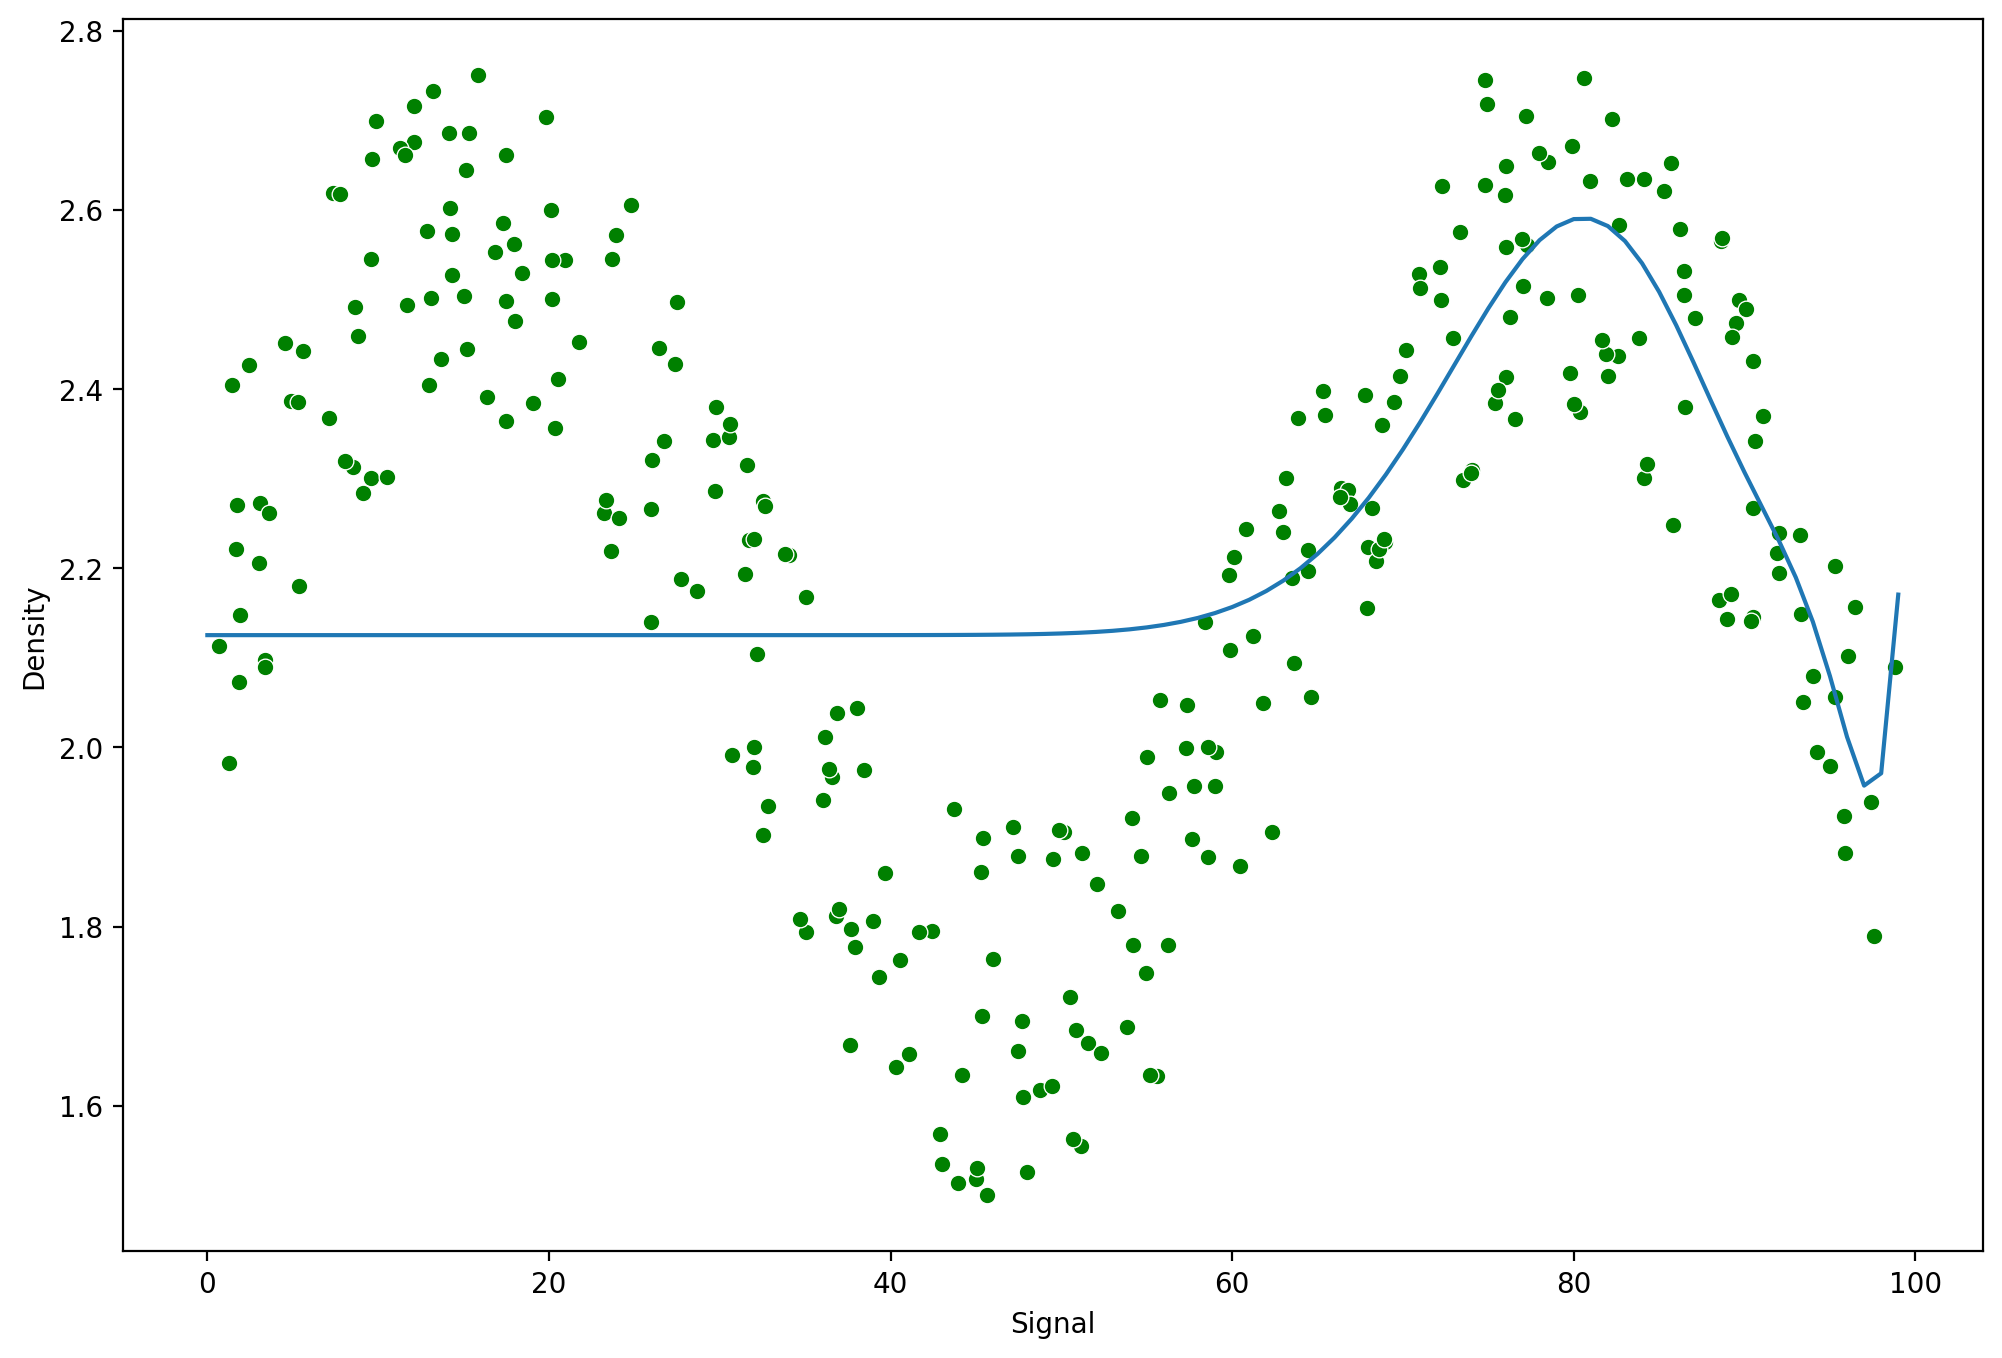

In [46]:
pipe = make_pipeline(PolynomialFeatures(degree=25), LinearRegression())
run_model(pipe, X_train, y_train, X_test, y_test)

# KNeighbors

MAE: 0.11877297474442378
RMSE: 0.1523487028635337
MAE: 0.12198383614100558
RMSE: 0.13730685016923647
MAE: 0.11635971693292672
RMSE: 0.13277855732740926
MAE: 0.13363165935705318
RMSE: 0.15954234753677107


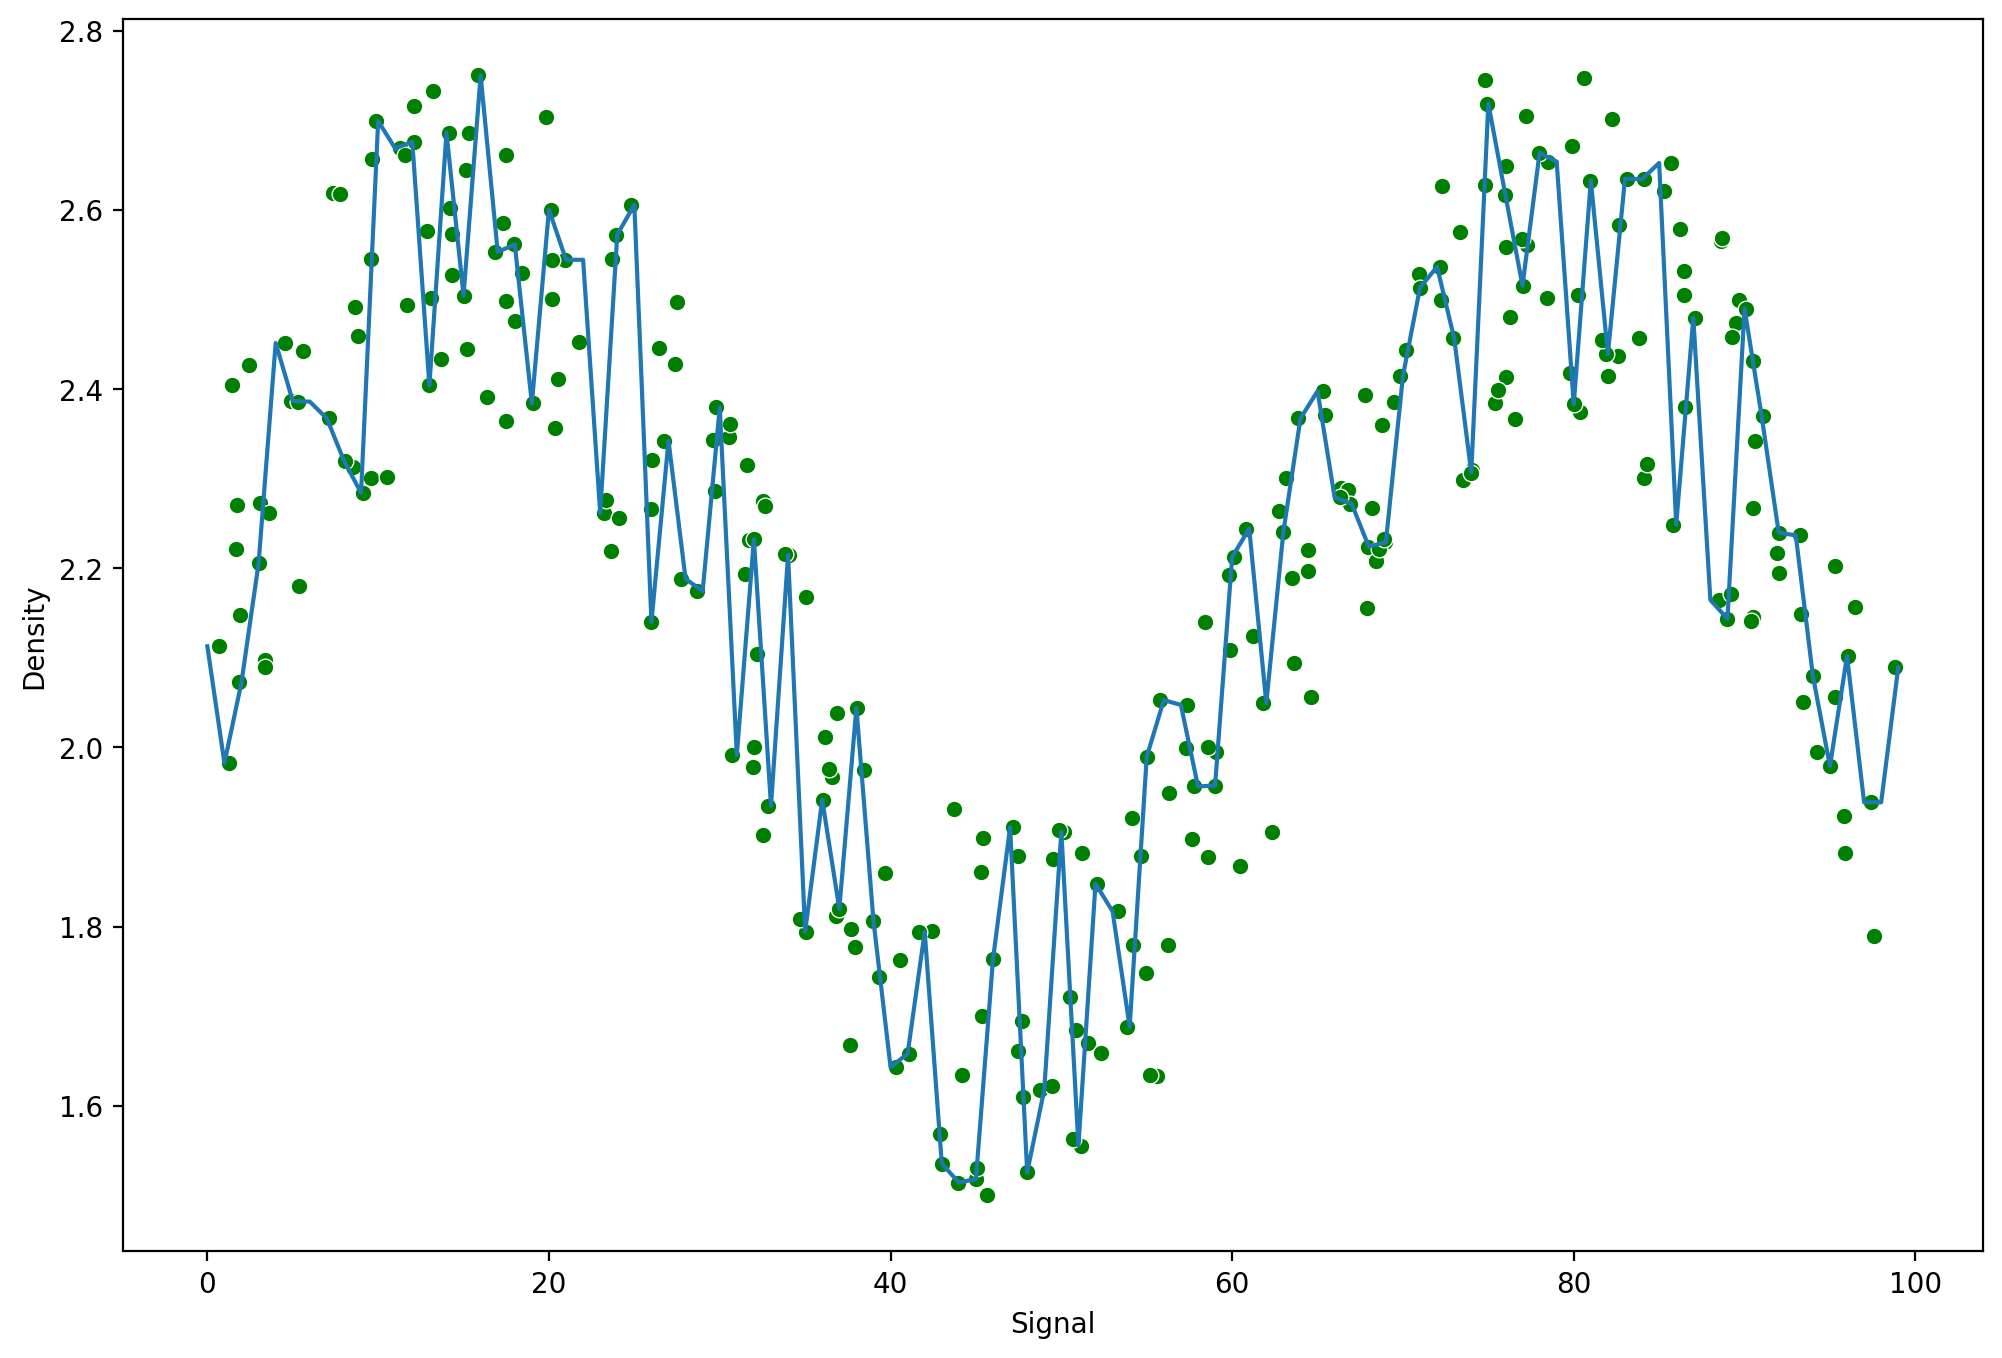

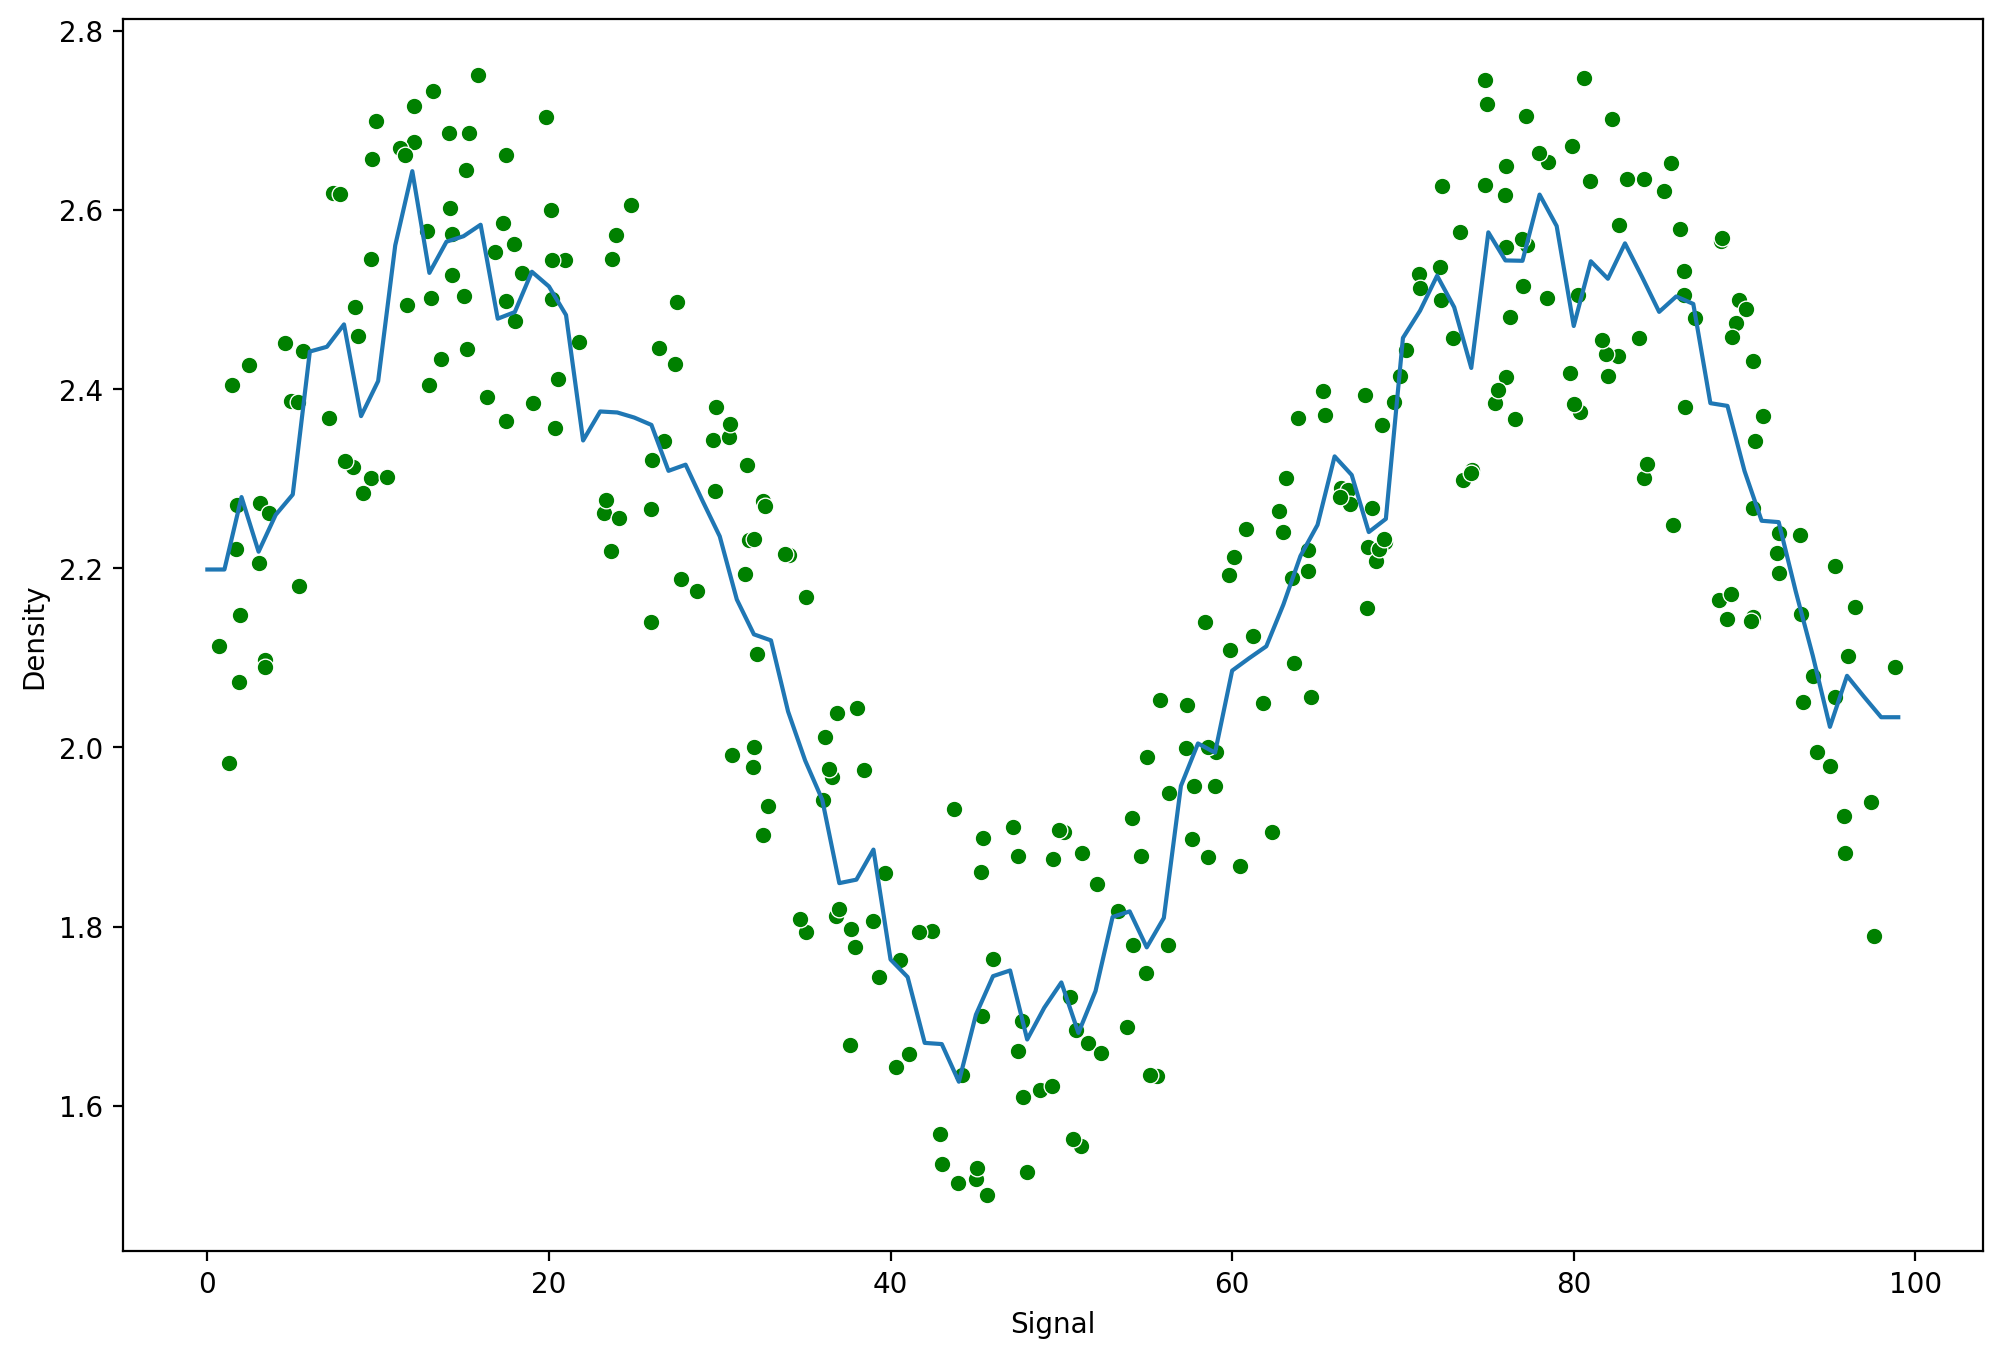

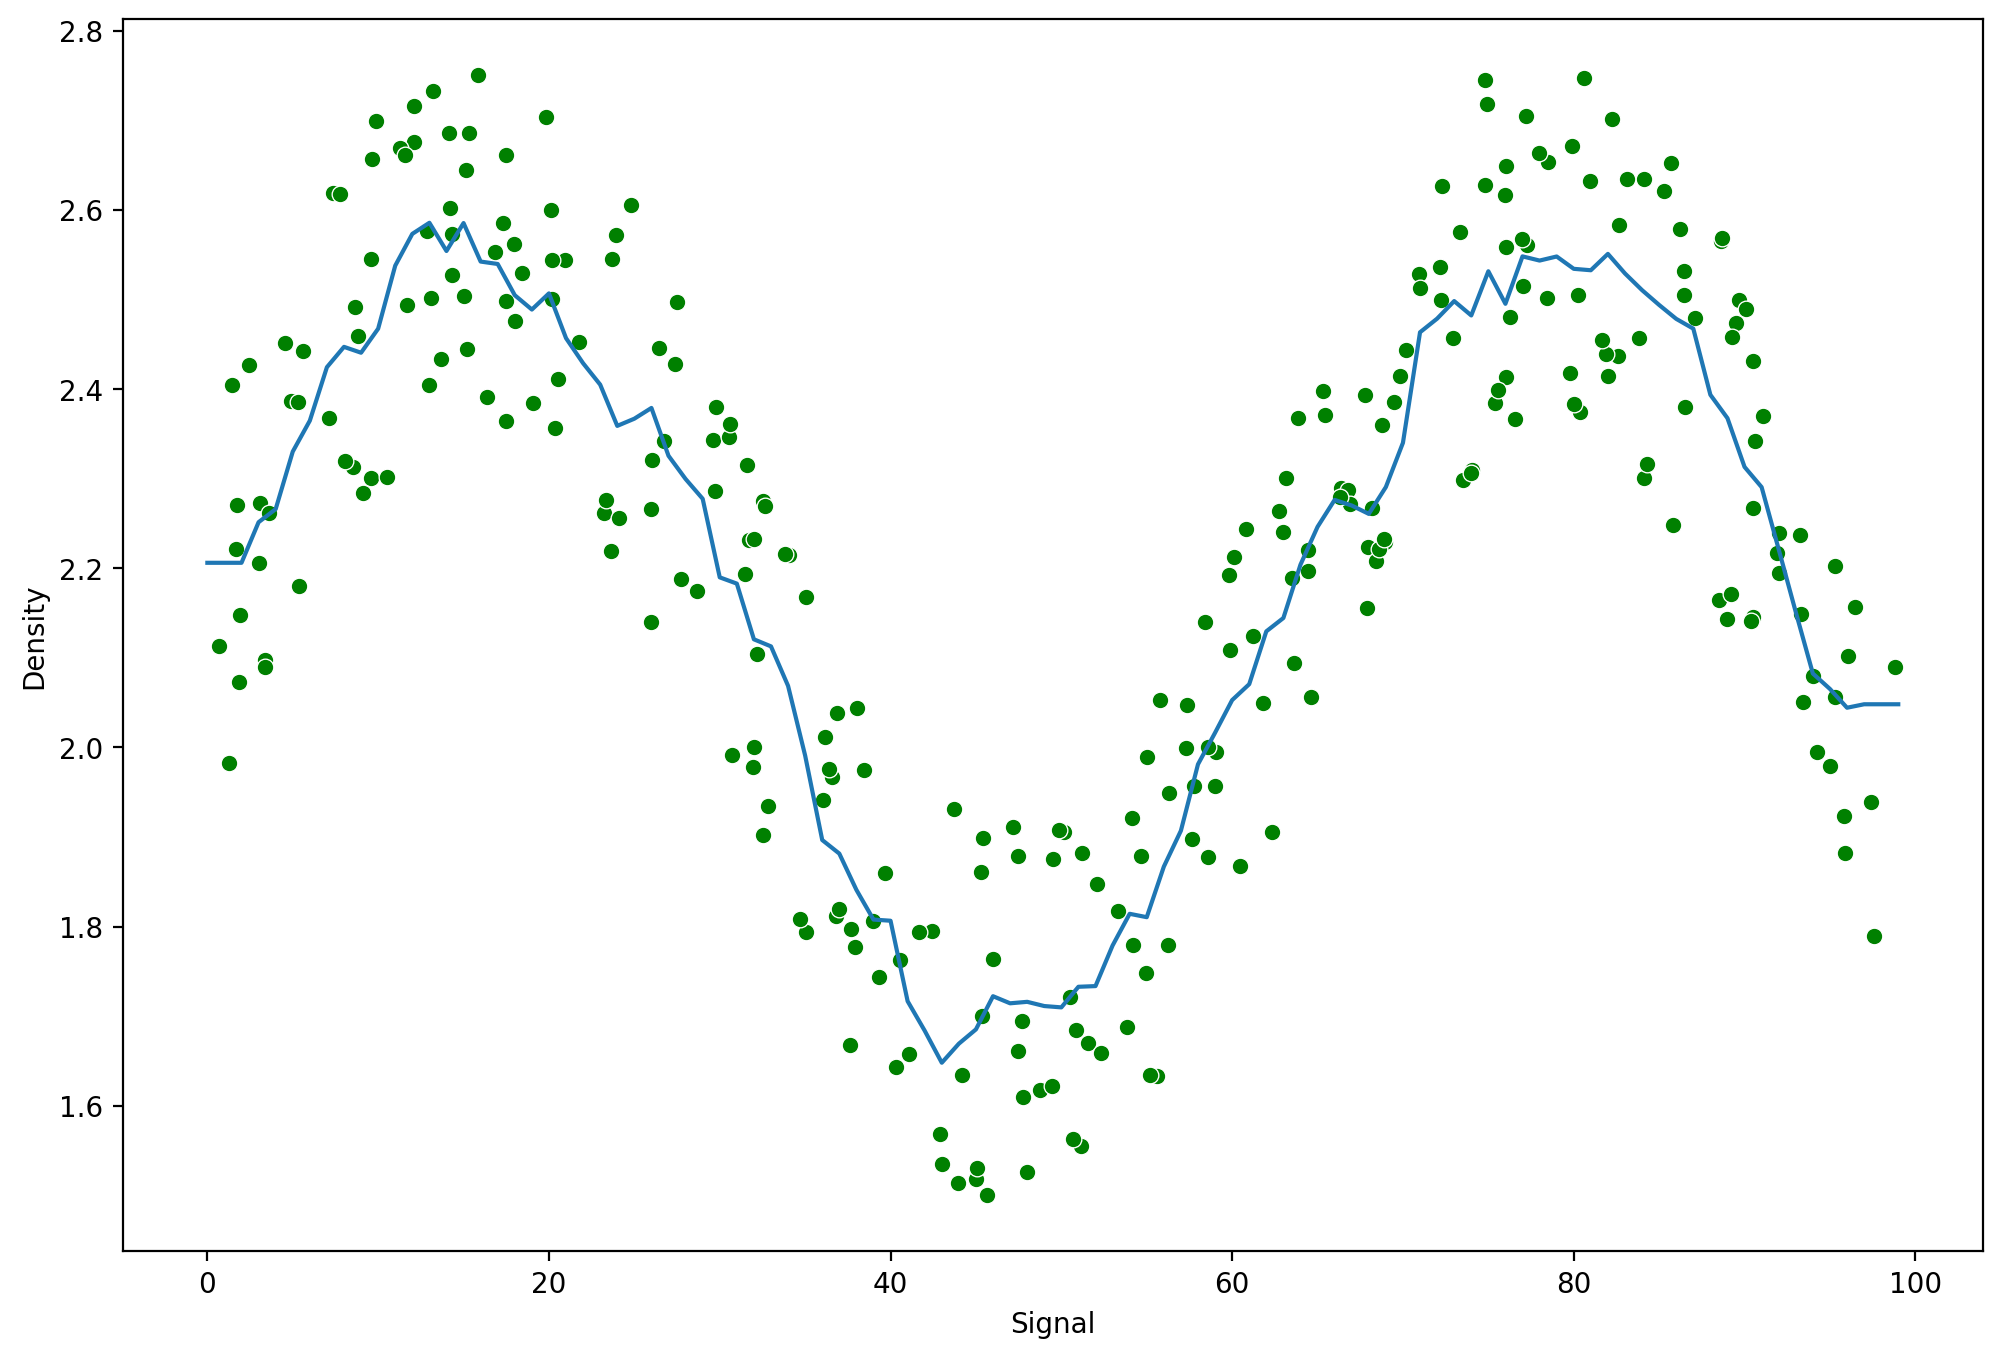

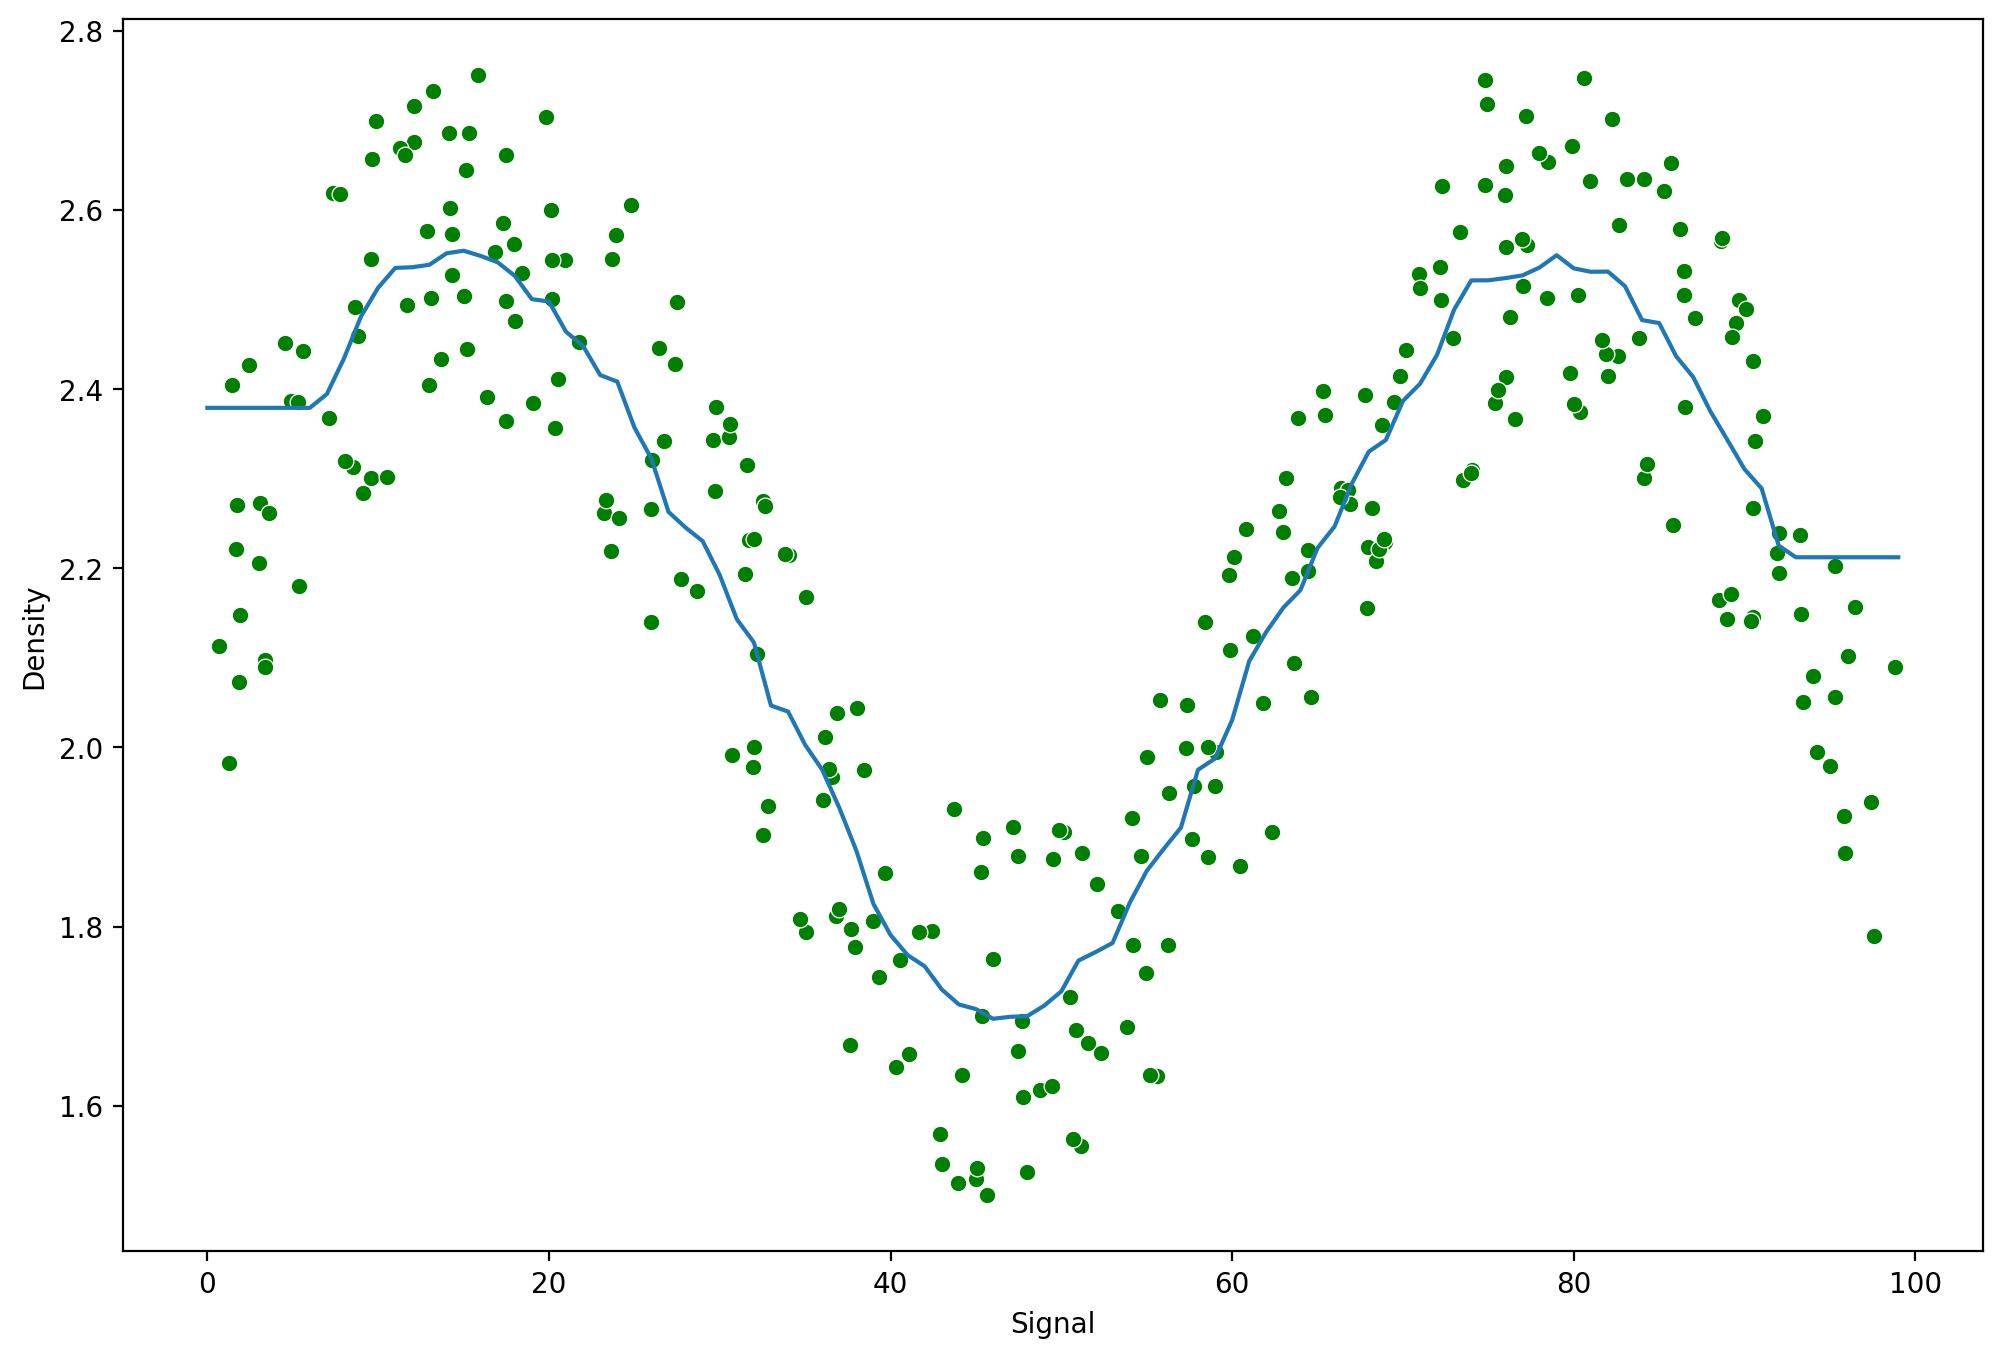

In [50]:
k_values = [1, 5, 10, 30]
for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model, X_train, y_train, X_test, y_test)

# DecisionTreeRegressor

MAE: 0.11877297474442378
RMSE: 0.1523487028635337


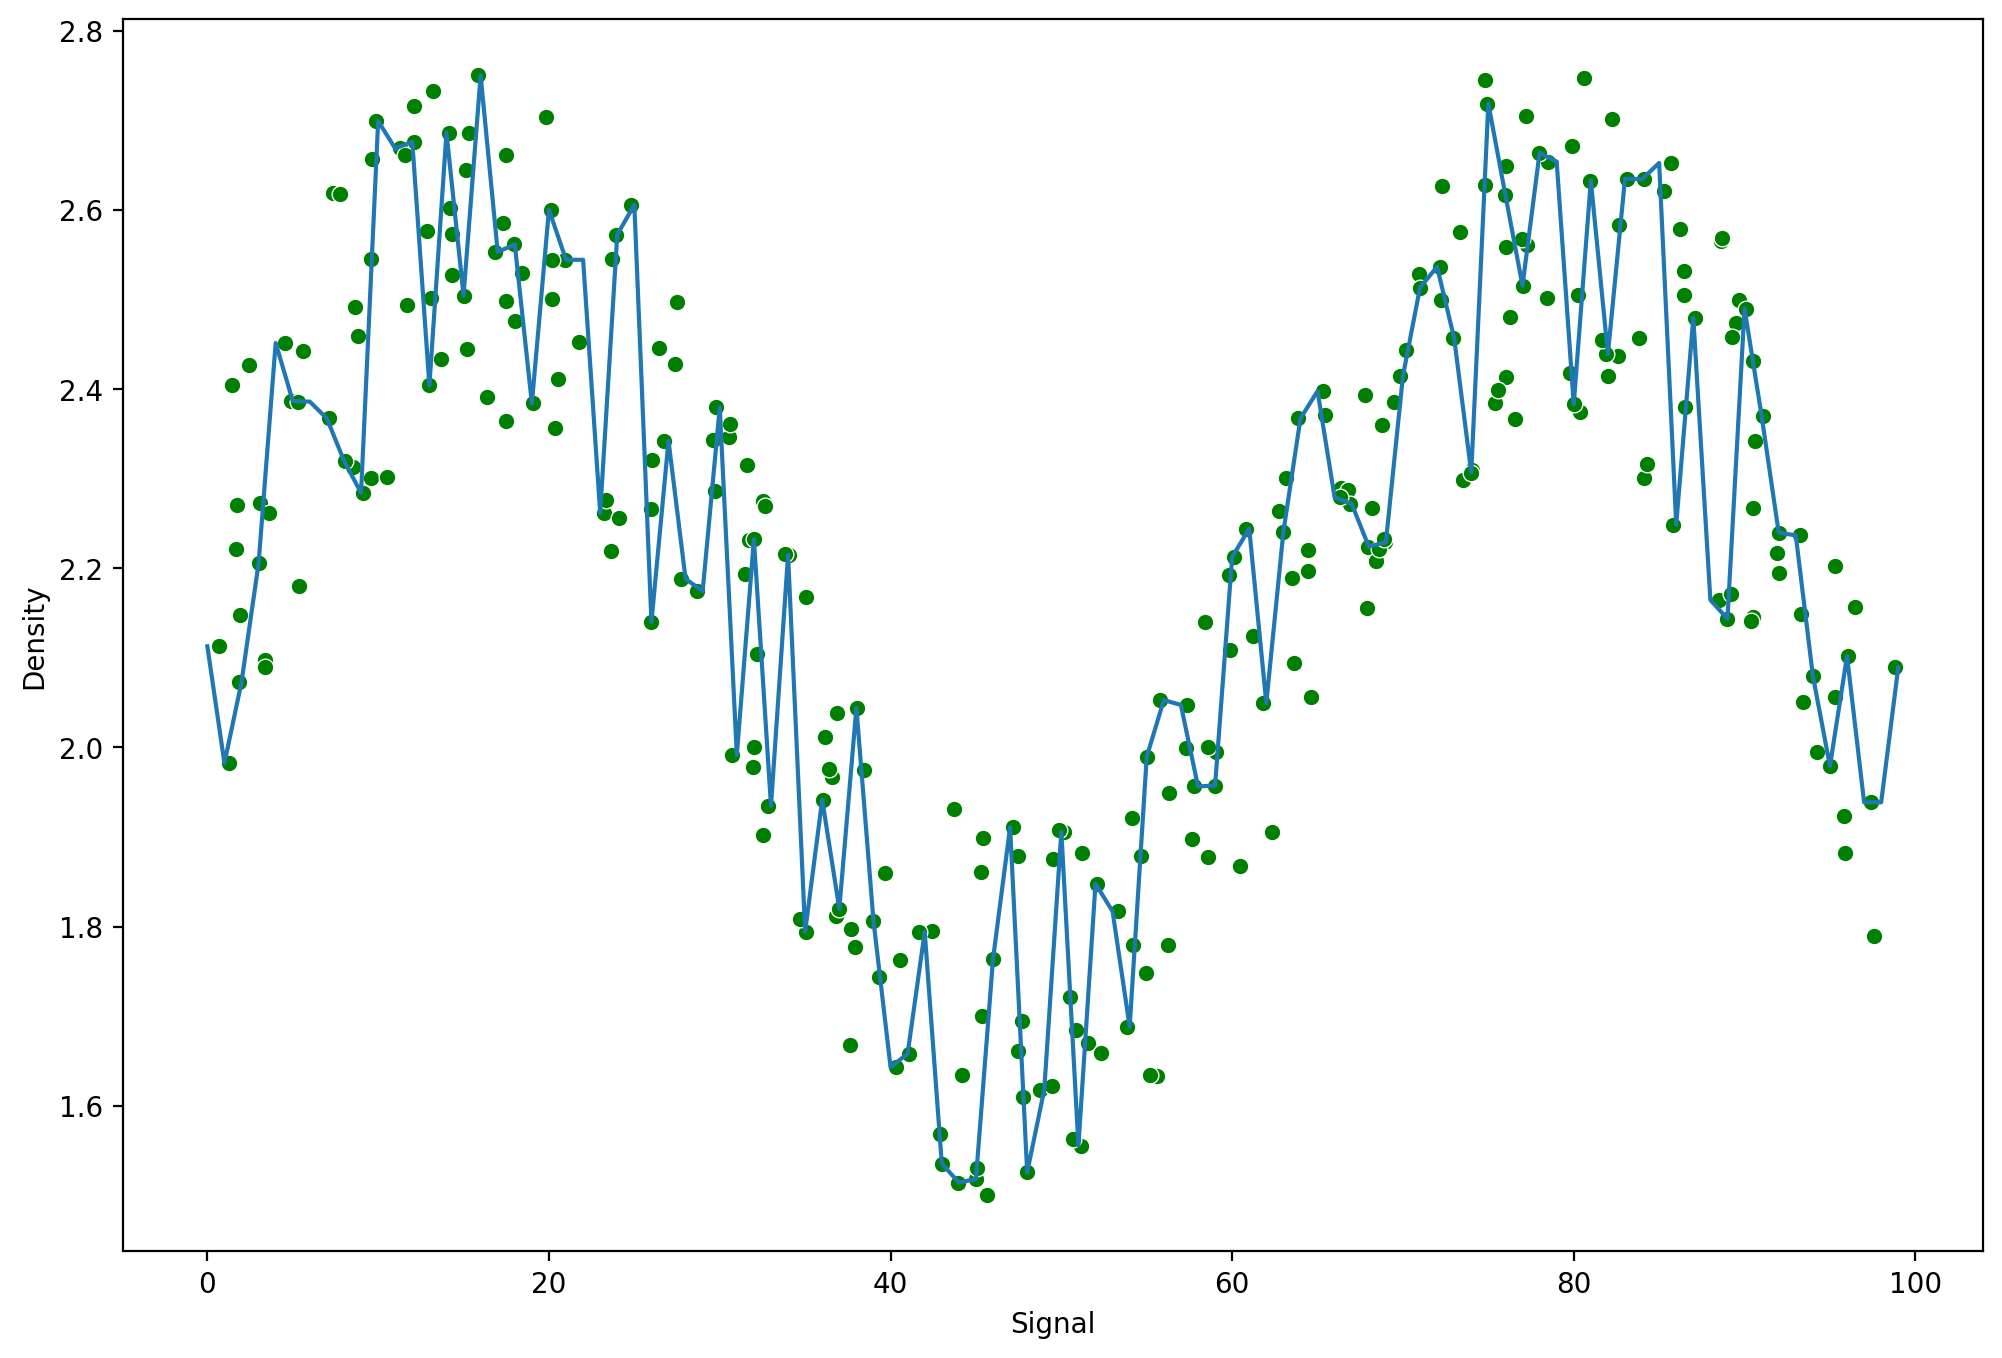

In [52]:
model = DecisionTreeRegressor()
run_model(model, X_train, y_train, X_test, y_test)

# SupportVector Regressor

MAE: 0.10854210121348368
RMSE: 0.12646999302046696


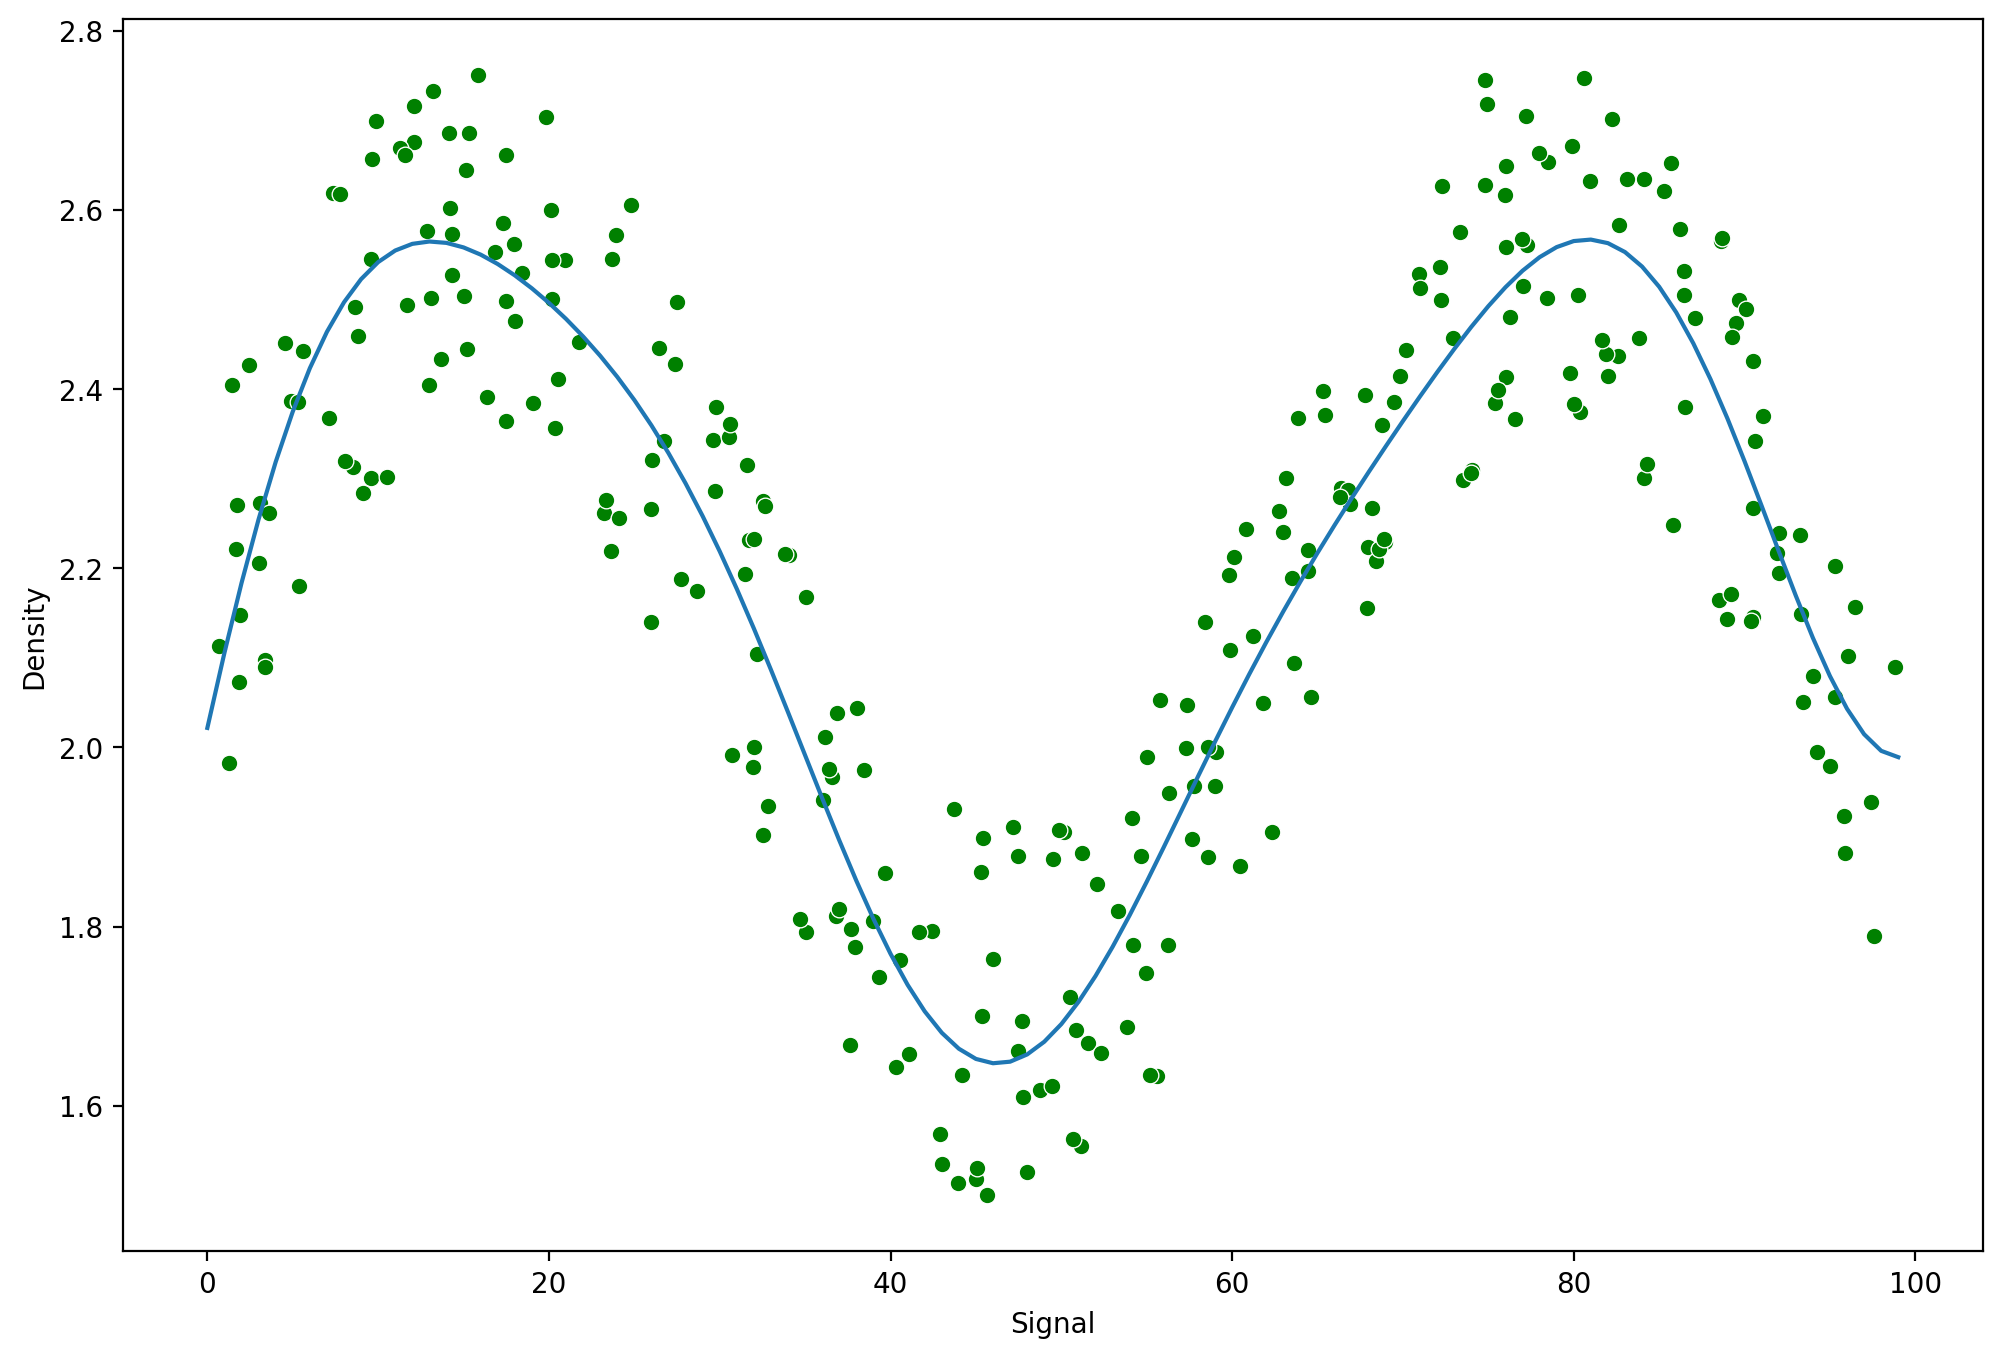

In [56]:
svr = SVR()
param_grid = {'C': [0.01, 0.1, 1, 5, 10, 100, 1000],
             'gamma': ['auto', 'scale']}
grid = GridSearchCV(svr, param_grid)

run_model(grid, X_train, y_train, X_test, y_test)

# RandomForestRegressor

In [58]:
rfr = RandomForestRegressor(n_estimators=10)

MAE: 0.10996011499351982
RMSE: 0.13185189073545675


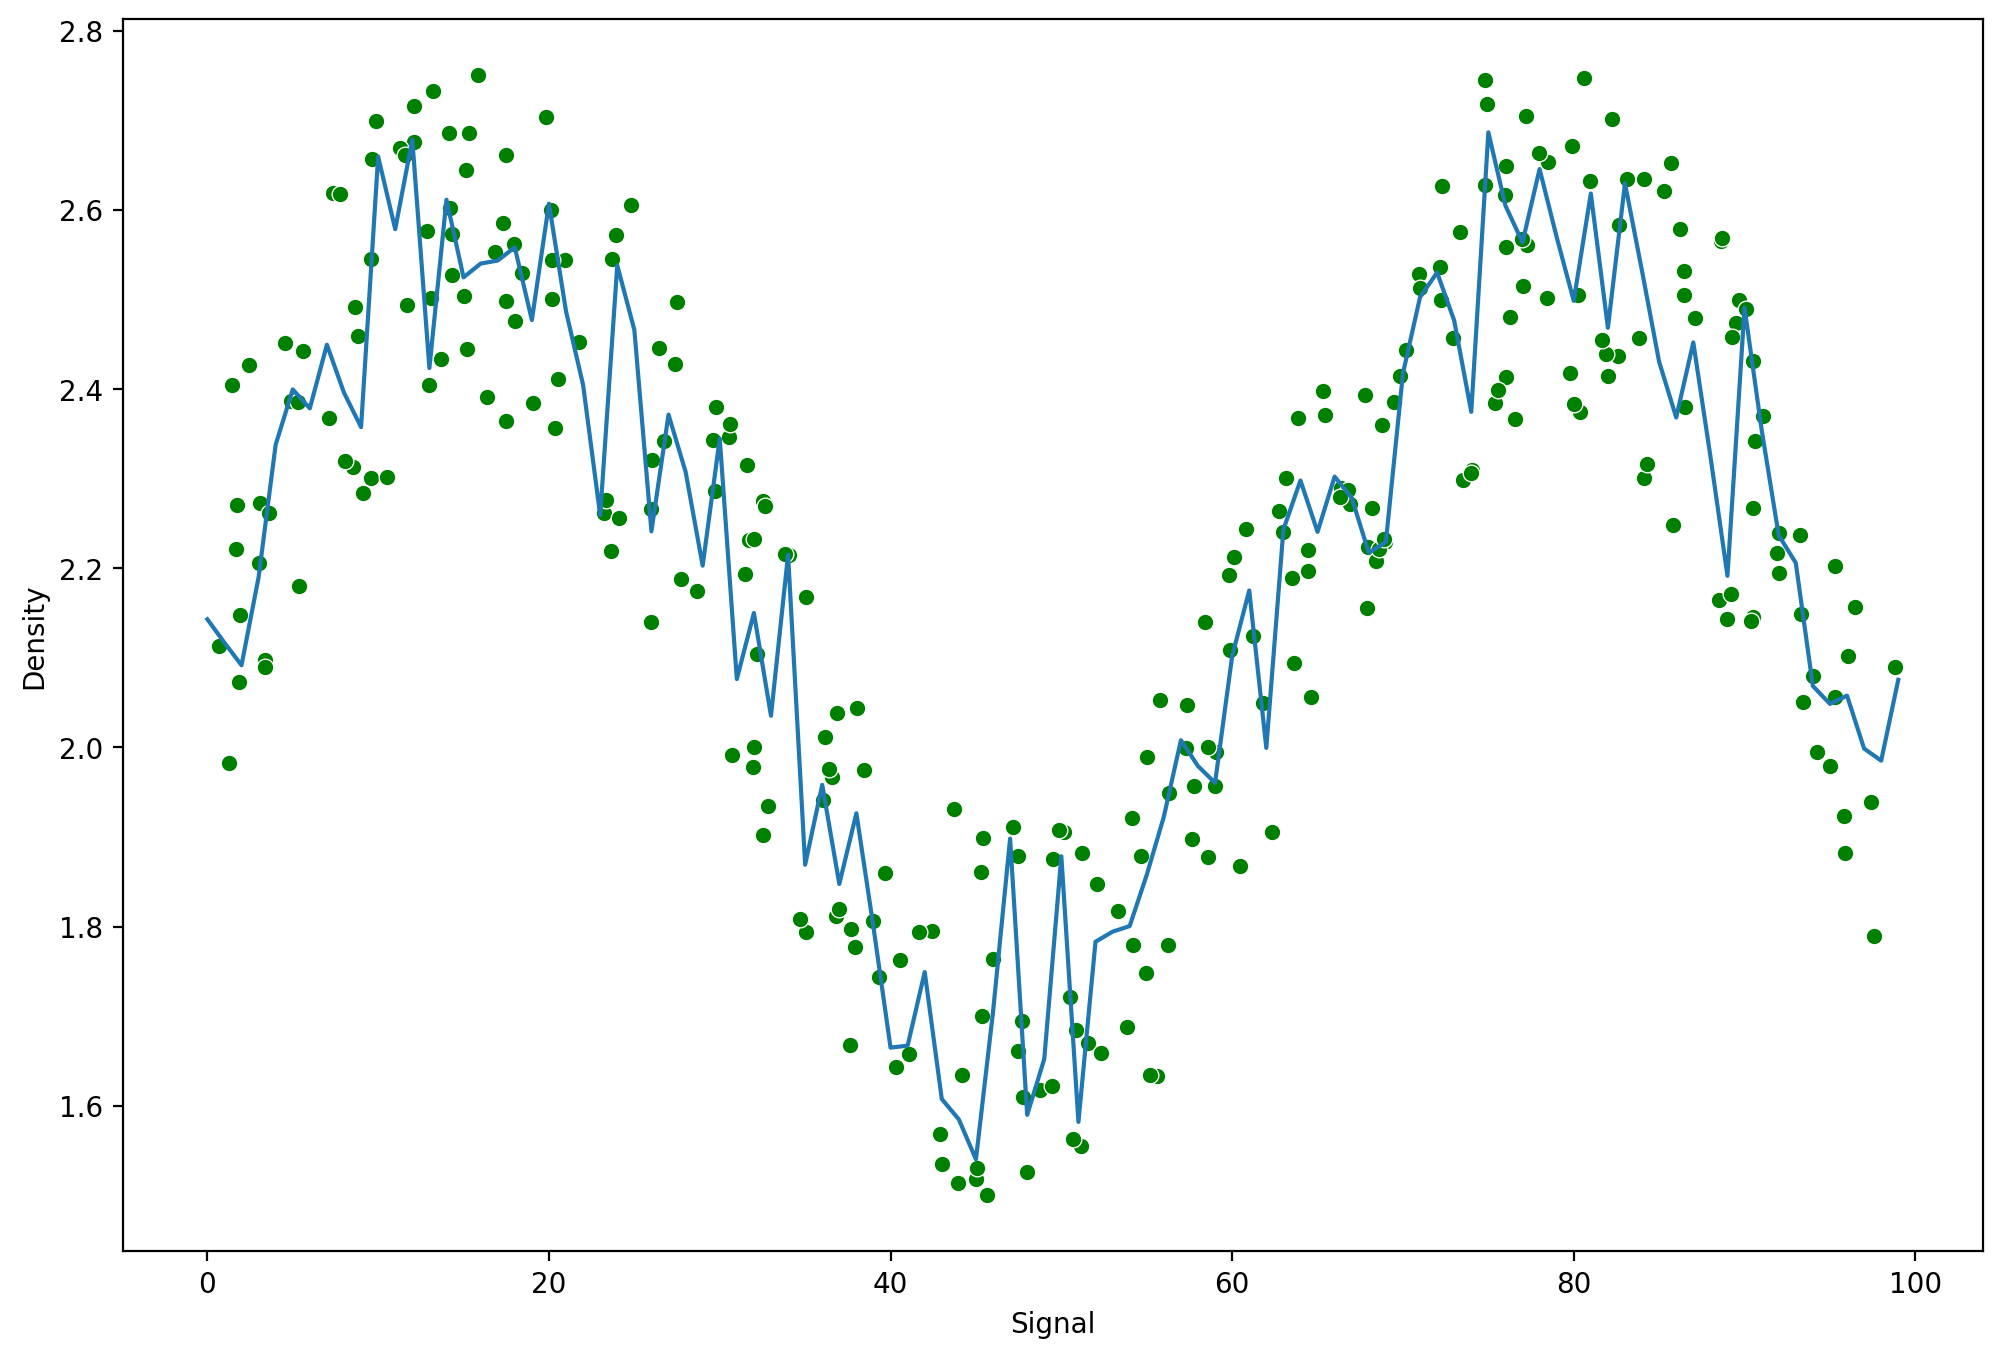

In [61]:
run_model(rfr, X_train, y_train, X_test, y_test)

MAE: 0.11318284854800689
RMSE: 0.13294148649584667


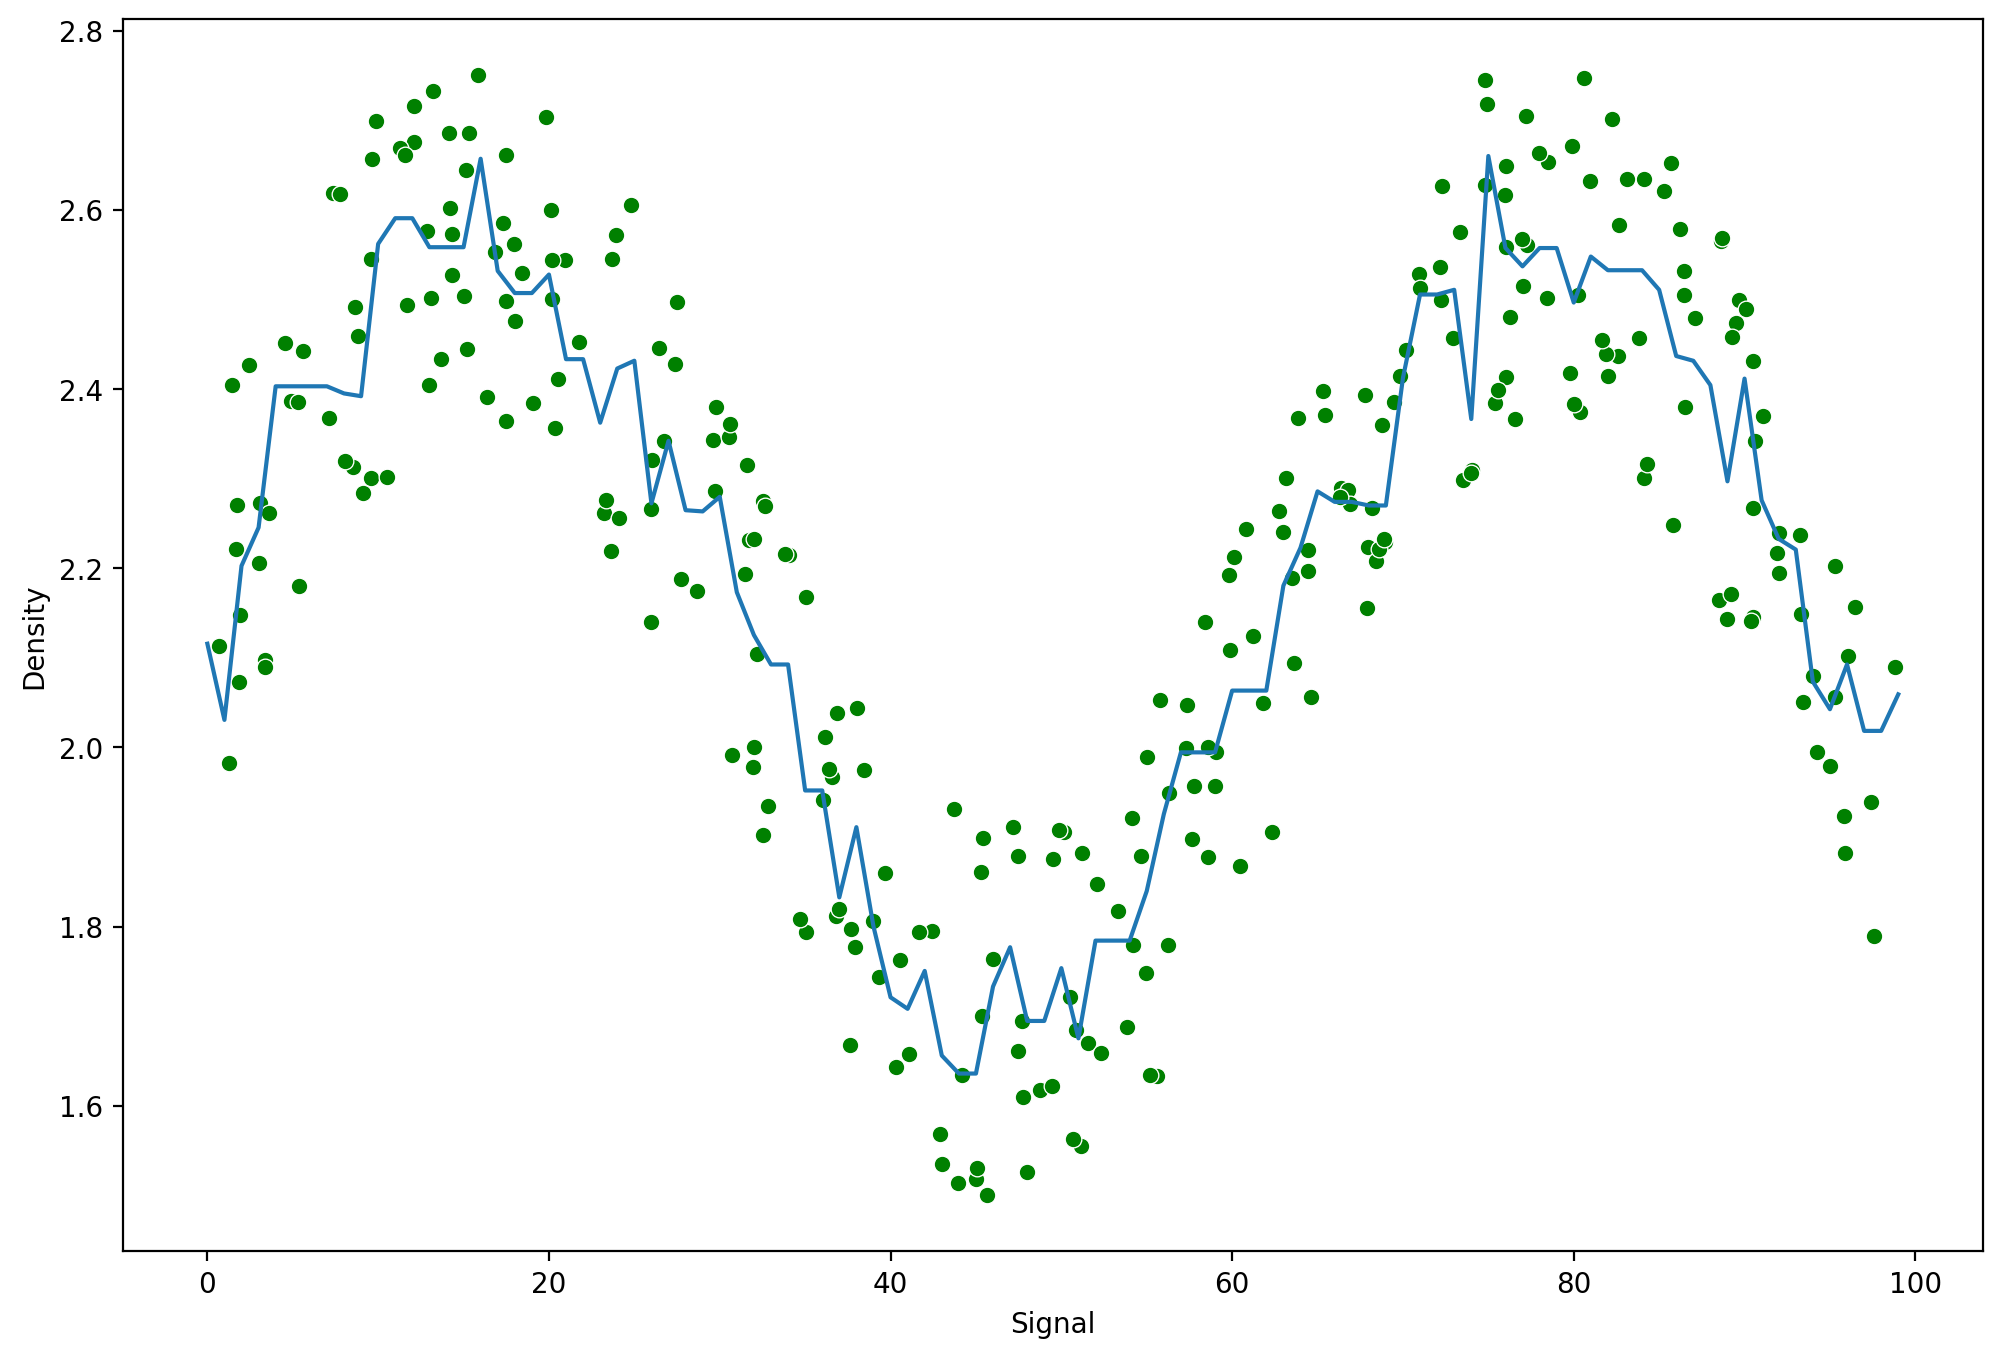

In [63]:
model = GradientBoostingRegressor()
run_model(model, X_train, y_train, X_test, y_test)

MAE: 0.11856525635520572
RMSE: 0.13562562992280638


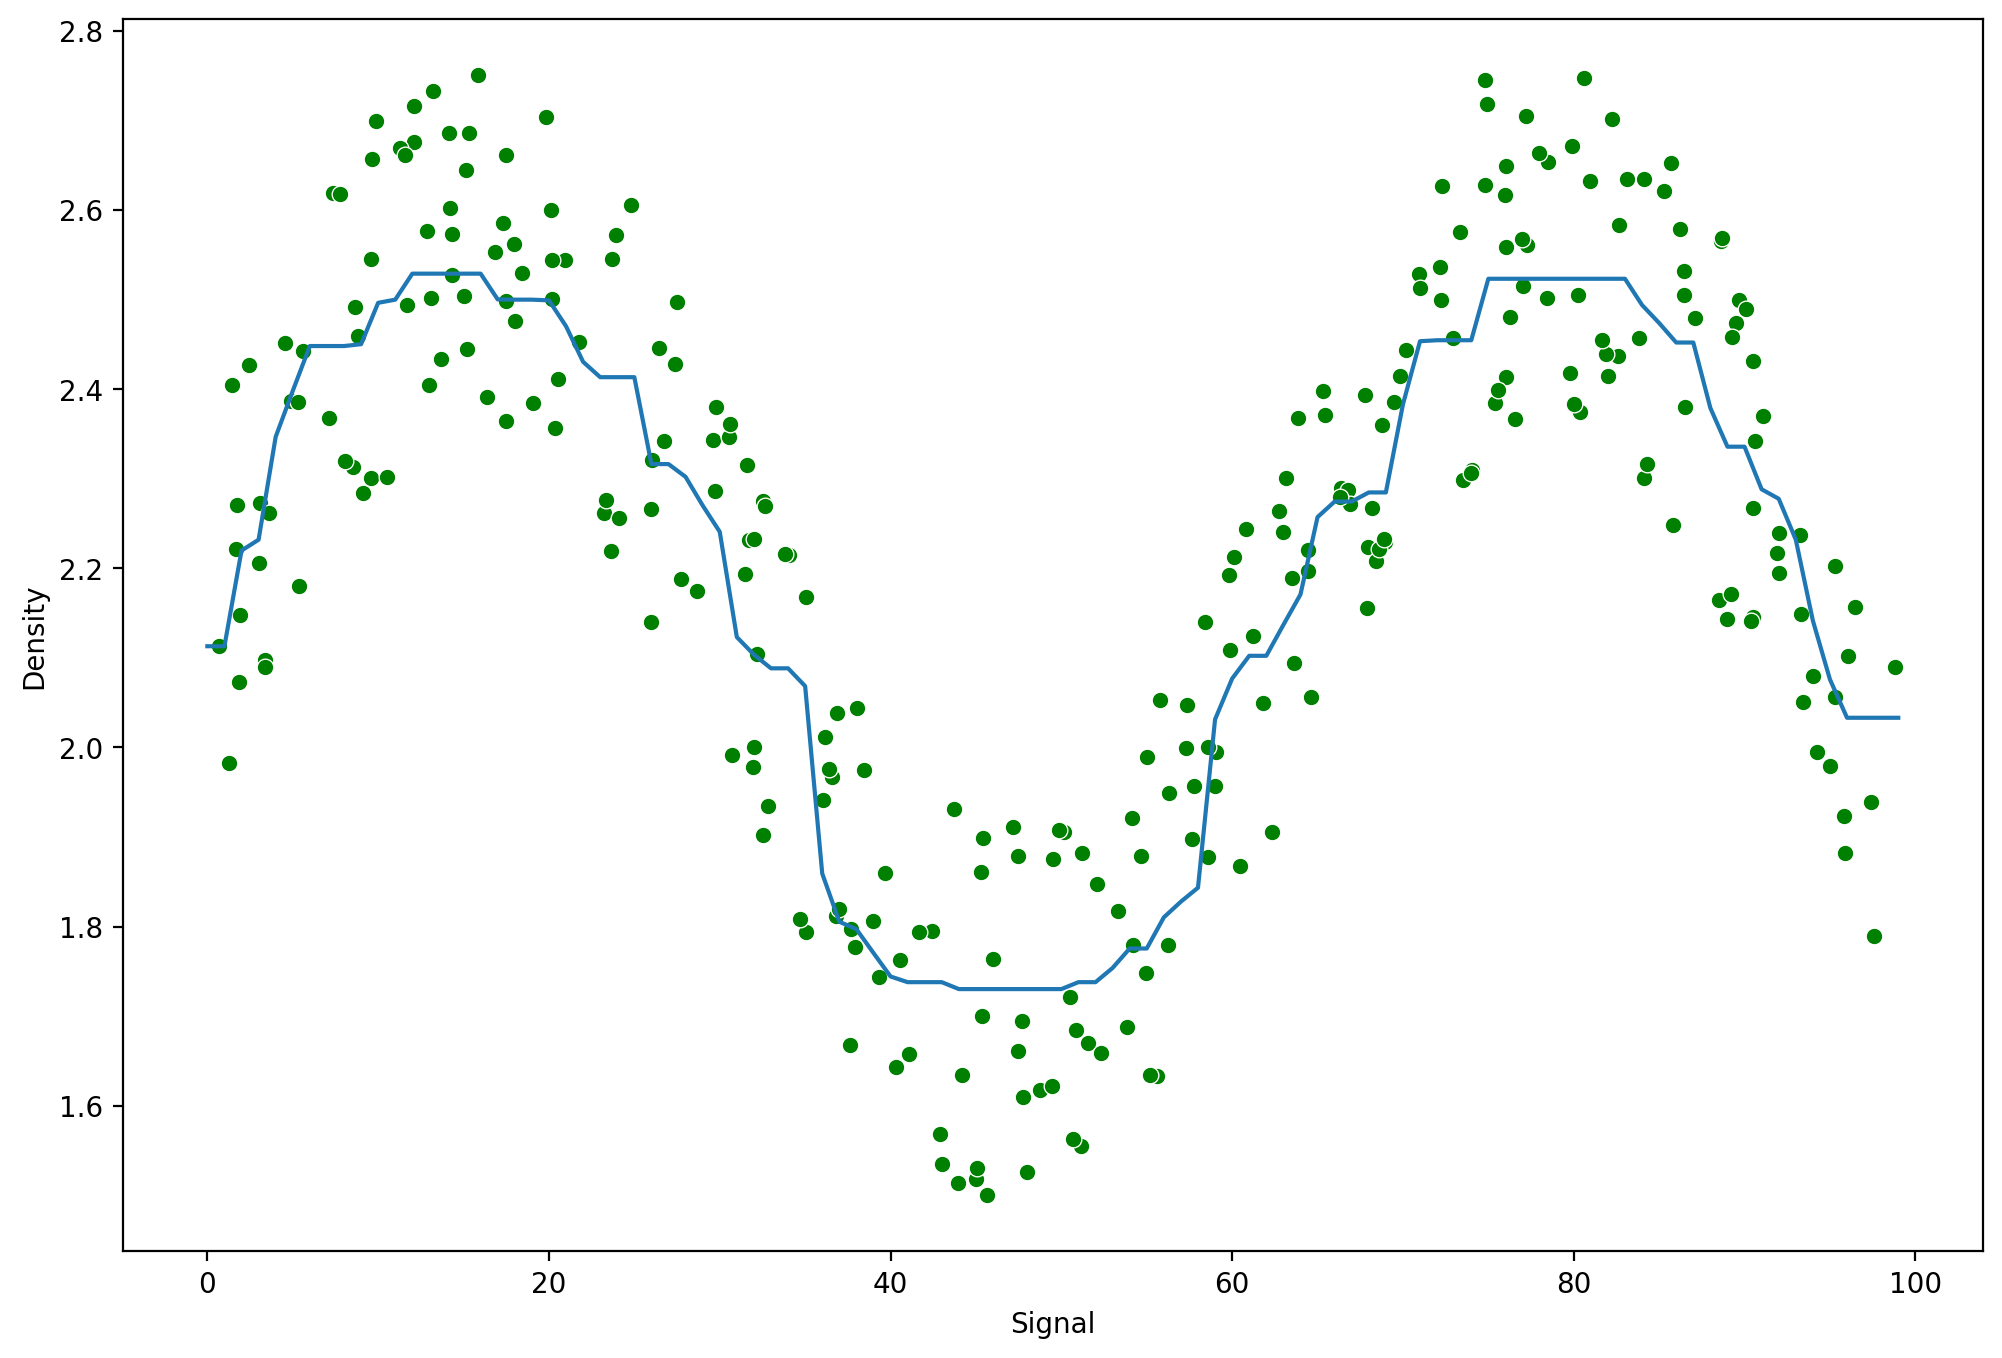

In [65]:
model = AdaBoostRegressor()
run_model(model, X_train, y_train, X_test, y_test)